## **NEURAL NETWORK**


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data=pd.read_excel(r"/content/drive/MyDrive/DATA-building.xlsx")
print(data)


      MONTH  DAY  YEAR  HOUR  TEMP   HUMID  SOLAR  WIND     WBE  WBCW  WBHW
0         9    1    89   200  81.9  0.0184    0.0  7.62  496.07   7.2   0.4
1         9    1    89   300  80.7  0.0187    0.0  7.94  497.06   7.1   0.5
2         9    1    89   400  79.7  0.0194    0.0  7.72  496.67   7.1   0.5
3         9    1    89   500  79.0  0.0197    0.1  6.08  494.54   7.1   0.6
4         9    1    89   600  78.9  0.0199    0.1  5.68  498.09   7.0   0.6
...     ...  ...   ...   ...   ...     ...    ...   ...     ...   ...   ...
2921     12   31    89  1900  47.6  0.0025    1.7  3.66  435.79   3.8   4.4
2922     12   31    89  2000  46.5  0.0026    1.8  2.38  431.14   3.8   4.8
2923     12   31    89  2100  46.1  0.0027    2.0  2.11  431.59   3.7   4.2
2924     12   31    89  2200  46.3  0.0028    2.0  2.34  435.44   3.8   4.4
2925     12   31    89  2300  45.2  0.0028    2.0  3.22  435.74   3.8   4.7

[2926 rows x 11 columns]


conti, discrete numbers-- should all be discrete or cont.
performansı etkiler bu durum
normalize

In [ ]:

scaler = MinMaxScaler()

df = scaler.fit_transform(data)
dataset = df
# split into input (X) and output (Y) variables
# split into input and output columns
x1, y1 = dataset[:, 0:8], dataset[:, 8:11] # bu ne

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)

# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)   #30% test data, 70% training data

#print(x_train.shape)
#print(y_train.shape)



In [ ]:
#print(dataset)
#print(x_train)
#print(y_train)

weight çıktı değerlerini bul !!!!
weight ne kadar azsa sonuca etkisi o kadar az

In [ ]:
def custom_loss_function(y_test, test_set_predictions):

  squared_difference = tf.square((y_test[:,0] - test_set_predictions[:,0]))
  mse_1= tf.reduce_mean(squared_difference, axis=-1)

  squared_difference = tf.square((y_test[:,1] - test_set_predictions[:,1]))
  mse_2= tf.reduce_mean(squared_difference, axis=-1)

  squared_difference = tf.square((y_test[:,2] - test_set_predictions[:,2]))
  mse_3= tf.reduce_mean(squared_difference, axis=-1)

  weighted_loss= (mse_1*5)+ mse_2 + mse_3

  return  weighted_loss

In [ ]:
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)


model = Sequential()
model.add(Dense(16, input_shape=(8,), activation='relu'))
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(40, input_shape=(8,), activation='relu'))
model.add(Dense(16, input_shape=(8,), activation='relu'))
model.add(Dense(3)) #3'ü 5 yapsak ne olur


model.compile(loss=custom_loss_function, optimizer='sgd')


weightsBiasDict = {}

weightAndBiasCallback = tf.keras.callbacks.LambdaCallback \
            (on_epoch_end=lambda epoch, logs: weightsBiasDict.update({epoch:model.get_weights()}))

print(weightsBiasDict)
#callbacks=weightAndBiasCallback

#callbacks=[es]
#es=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

# fit the keras model on the training set
history= model.fit(x_train, y_train, epochs=200, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True ,callbacks=weightAndBiasCallback )



model.summary()

{}
Epoch 1/200
359/359 - 2s - loss: 0.2987 - val_loss: 0.2441 - 2s/epoch - 6ms/step
Epoch 2/200
359/359 - 1s - loss: 0.2245 - val_loss: 0.2081 - 861ms/epoch - 2ms/step
Epoch 3/200
359/359 - 1s - loss: 0.2065 - val_loss: 0.2258 - 717ms/epoch - 2ms/step
Epoch 4/200
359/359 - 1s - loss: 0.1985 - val_loss: 0.1962 - 922ms/epoch - 3ms/step
Epoch 5/200
359/359 - 1s - loss: 0.1950 - val_loss: 0.1919 - 898ms/epoch - 3ms/step
Epoch 6/200
359/359 - 1s - loss: 0.1828 - val_loss: 0.2851 - 757ms/epoch - 2ms/step
Epoch 7/200
359/359 - 1s - loss: 0.1851 - val_loss: 0.1966 - 868ms/epoch - 2ms/step
Epoch 8/200
359/359 - 1s - loss: 0.1798 - val_loss: 0.1783 - 829ms/epoch - 2ms/step
Epoch 9/200
359/359 - 1s - loss: 0.1770 - val_loss: 0.4131 - 825ms/epoch - 2ms/step
Epoch 10/200
359/359 - 1s - loss: 0.1740 - val_loss: 0.1721 - 844ms/epoch - 2ms/step
Epoch 11/200
359/359 - 1s - loss: 0.1686 - val_loss: 0.2037 - 1s/epoch - 3ms/step
Epoch 12/200
359/359 - 1s - loss: 0.1676 - val_loss: 0.3985 - 1s/epoch - 3ms/

dropout term - layer
fazla neuron varsa silmeye çalışıyor
1 outğutu düzeltmeye çalış


In [ ]:
weights_beginning = list(weightsBiasDict.values())[0]
print(weights_beginning)

In [ ]:
model.layers[0].get_weights()[0]

In [ ]:
# evaluate on test set
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


#print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

print(y_train)
print(train_set_predictions)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)



28/28 [==============================] - 0s 2ms/step
Test R2 square: 0.7793686944310396
Test MAE:  0.06686927
Test MSE:  0.011598862
64/64 [==============================] - 0s 1ms/step
[[0.8057389  0.675      0.24590164]
 [0.83617276 0.7625     0.09836066]
 [0.02859811 0.2125     0.91803277]
 ...
 [0.6462433  0.8125     0.06557377]
 [0.3619207  0.8125     0.06557377]
 [0.25896105 0.7125     0.18032786]]
[[0.8818642  0.6843517  0.1957894 ]
 [0.94738305 0.8078927  0.05494589]
 [0.10257059 0.22414476 0.9696068 ]
 ...
 [0.536119   0.7961537  0.07927039]
 [0.38969952 0.82536554 0.03234106]
 [0.34151858 0.7271085  0.16258012]]
Train R2 square: 0.8349684218184864
Train MAE:  0.059930462
Train MSE:  0.008454461


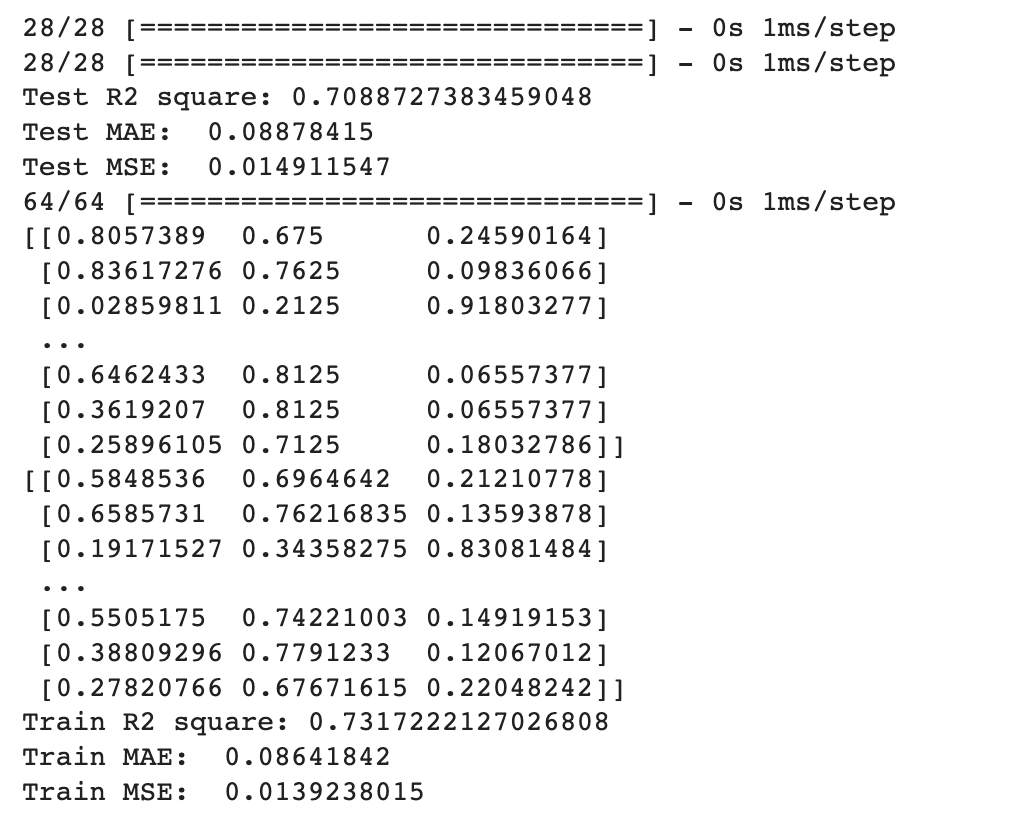

Separate test mse values of each output




WBE- output 1

In [ ]:
mae=metrics.mean_absolute_error(y_test[:,0], test_set_predictions[:,0])
mse_wbe=metrics.mean_squared_error(y_test[:,0], test_set_predictions[:,0])
r2=metrics.r2_score(y_test[:,0], test_set_predictions[:,0])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbe)

Test R2 square: 0.569472061462993
Test MAE:  0.106539935
Test MSE:  0.027064867


WBCW - output 2


In [ ]:
mae=metrics.mean_absolute_error(y_test[:,1], test_set_predictions[:,1])
mse_wbcw=metrics.mean_squared_error(y_test[:,1], test_set_predictions[:,1])
r2=metrics.r2_score(y_test[:,1], test_set_predictions[:,1])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbcw)

Test R2 square: 0.8519543841069992
Test MAE:  0.045691453
Test MSE:  0.0035005854


WBHW- output 3

In [ ]:
mae=metrics.mean_absolute_error(y_test[:,2], test_set_predictions[:,2])
mse_wbhw=metrics.mean_squared_error(y_test[:,2], test_set_predictions[:,2])
r2=metrics.r2_score(y_test[:,2], test_set_predictions[:,2])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbhw)

Test R2 square: 0.9166796349122013
Test MAE:  0.048376445
Test MSE:  0.0042311354


when the mse values are compared, we observe that the test mse of output 1 is nearly 10 times bigger then mse of output 2 and 3

In [ ]:
n=y_test.shape[0]
print(n)
dataset=pd.DataFrame(dataset)
def backnorm(x):
  denormalized_data=np.zeros((n,3))
  for i in range(n):
    for j in range(3):

       denormalized_data[i,j]=(x[i,j]+1)/2*(np.max(data.iloc[:,8+j]-np.min(data.iloc[:,8+j])))+np.min(data.iloc[:,8+j])

  return denormalized_data

878


In [ ]:
test_set_predictions_deno= backnorm(test_set_predictions)


In [ ]:
y_test_deno=backnorm(y_test)

In [ ]:
test_set_predictions_deno

array([[950.65067764,   6.90848637,   3.66946104],
       [772.32128016,   7.58754301,   3.34925782],
       [846.83936154,   5.80870891,   5.01722982],
       ...,
       [989.87030453,   6.84272671,   3.91709815],
       [883.12457068,   6.06214666,   4.69919438],
       [897.95634508,   5.91223907,   4.80755661]])

In [ ]:
y_test_deno

array([[969.584992  ,   6.70000005,   3.64999998],
       [753.18000189,   7.5       ,   3.4       ],
       [854.17999587,   5.75      ,   4.75000003],
       ...,
       [969.15999651,   6.95000005,   4.00000001],
       [800.88999779,   5.79999995,   4.55      ],
       [966.59499521,   6.0999999 ,   4.84999991]])

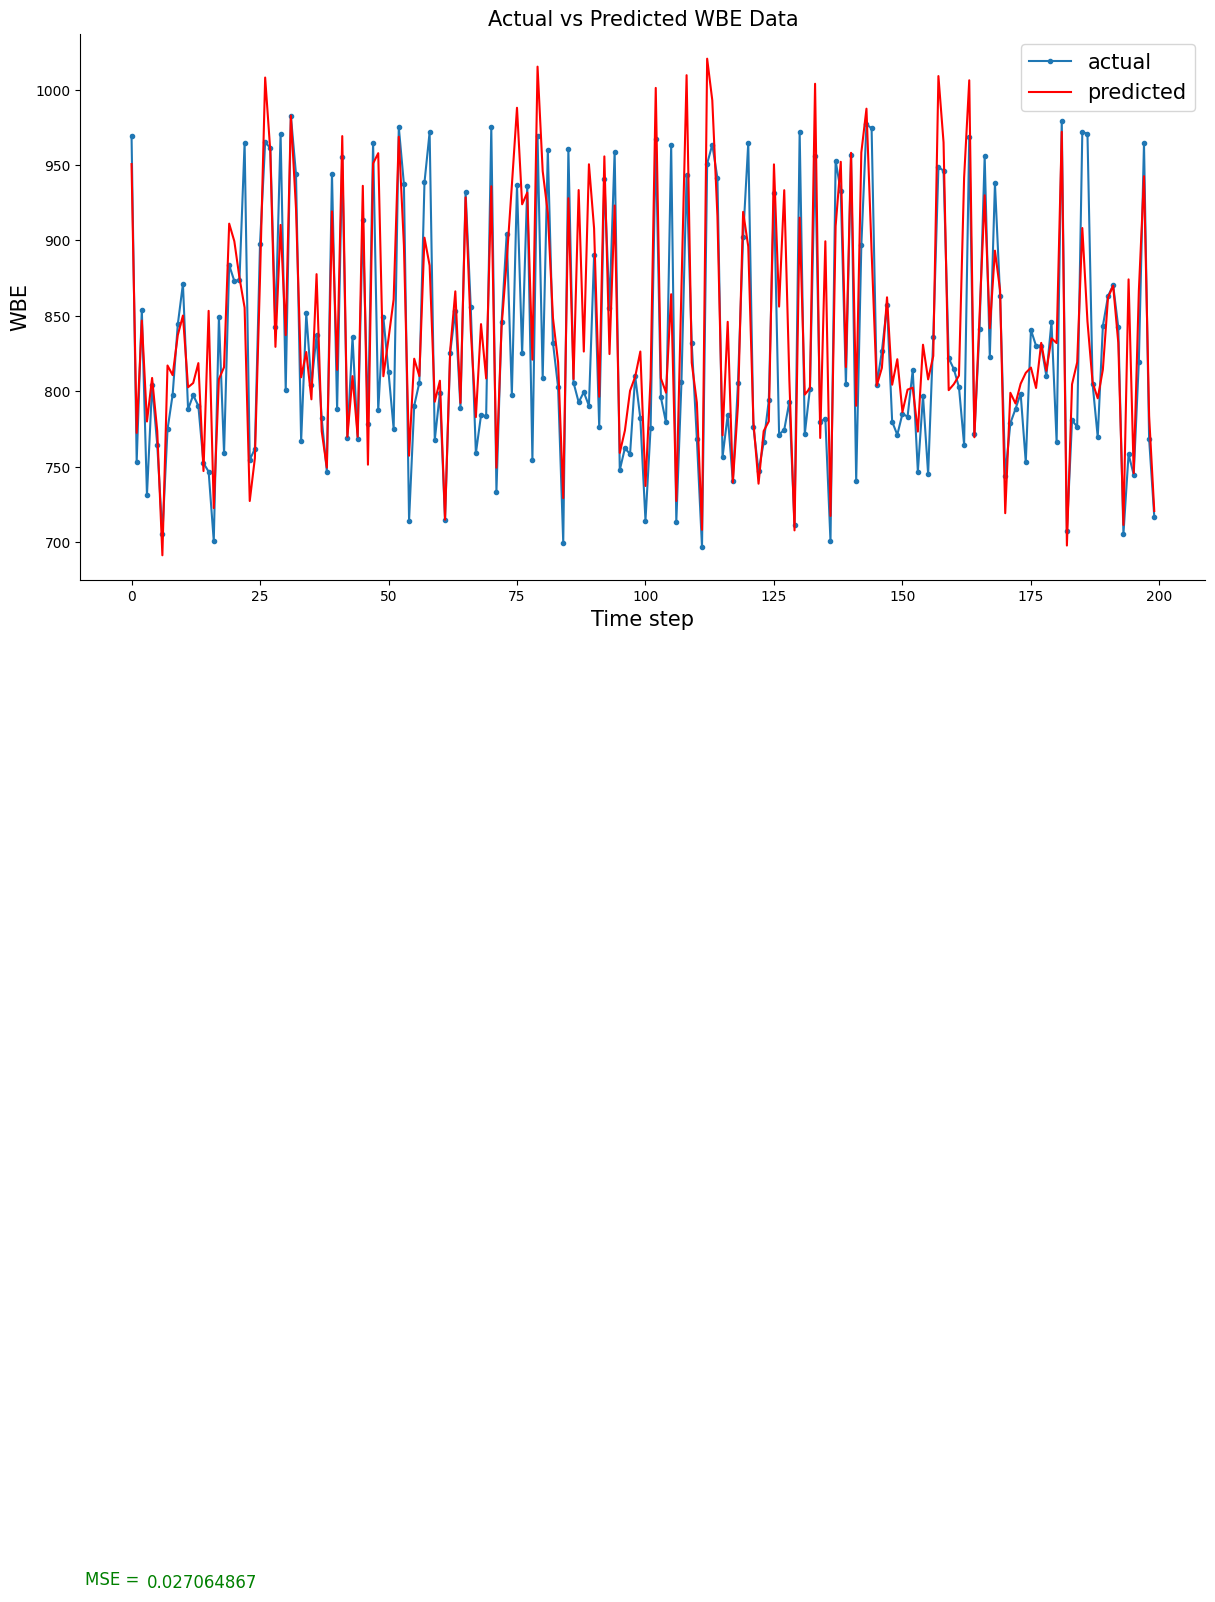

In [ ]:


aa=[x for x in range(200)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test_deno[:200,0], marker='.', label="actual")
plt.plot(aa, test_set_predictions_deno[:200,0], 'r', label="predicted")

plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.05)
plt.ylabel('WBE', size=15)
plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 12, color = 'g')
plt.text(3, 6, mse_wbe,
         fontsize = 12, color = 'g')
plt.title("Actual vs Predicted WBE Data", fontsize =15)
plt.legend(fontsize=15)


plt.show();

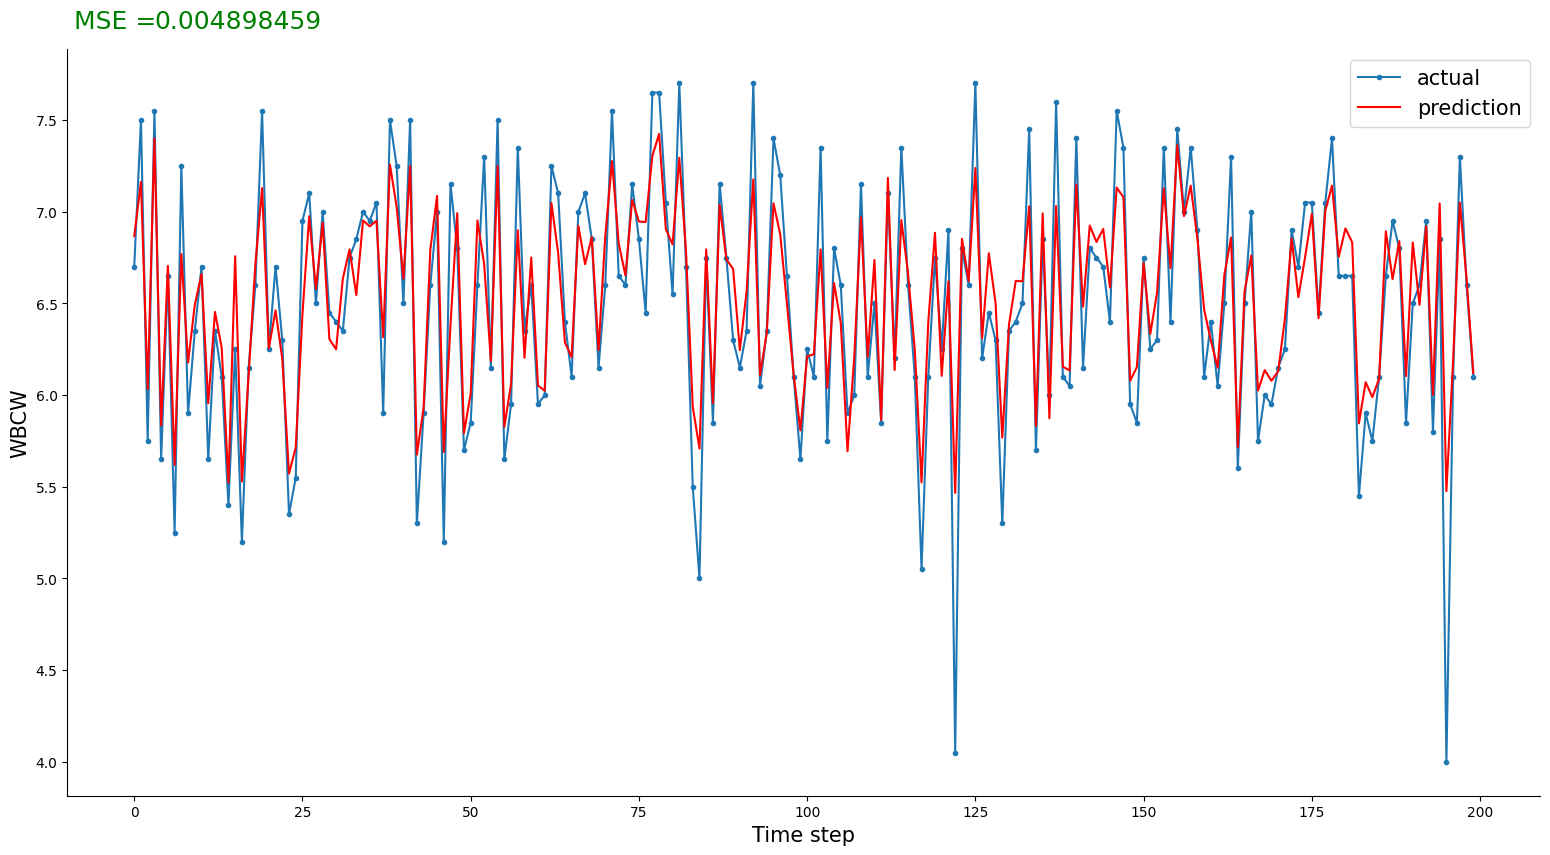

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,1], marker='.', label="actual")
plt.plot(aa, test_set_predictions_deno[:200,1], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBCW', size=15)
plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbcw,
         fontsize = 18, color = 'g')
plt.legend(fontsize=15)
plt.show();

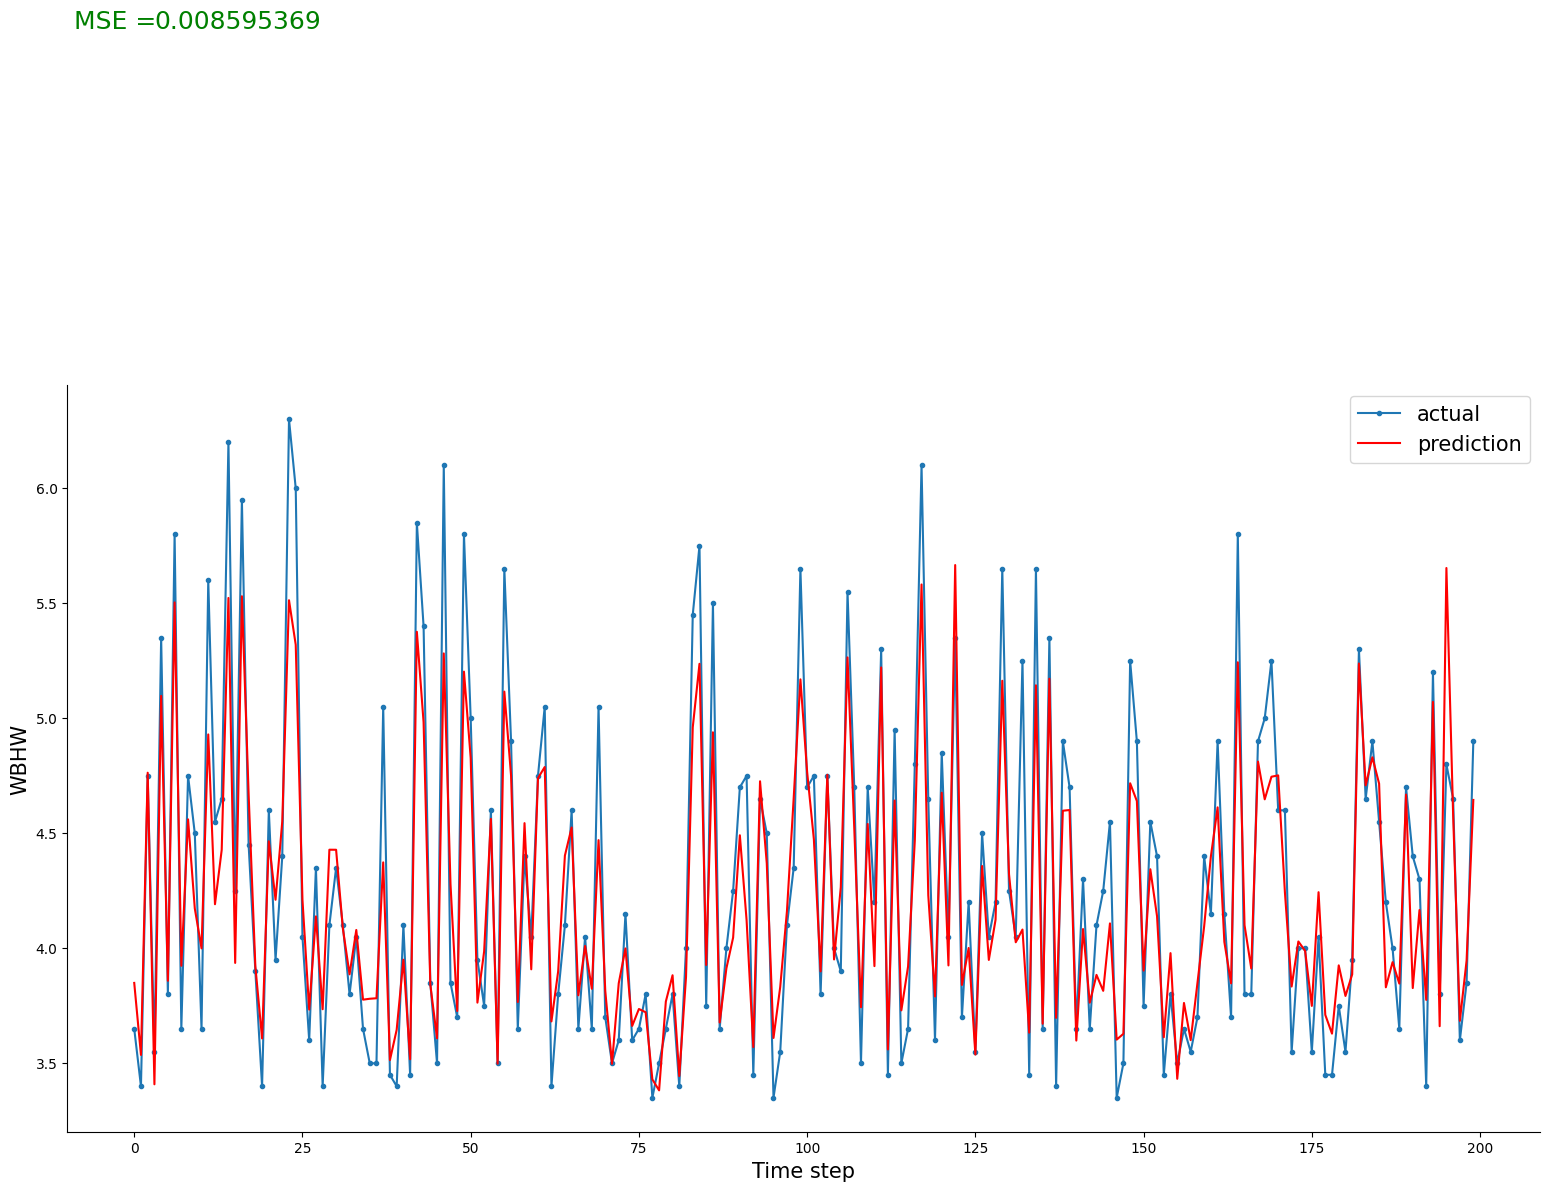

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,2], marker='.', label="actual")
plt.plot(aa, test_set_predictions_deno[:200,2], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBHW', size=15)
plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbhw,
         fontsize = 18, color = 'g')
plt.legend(fontsize=15)
plt.show();

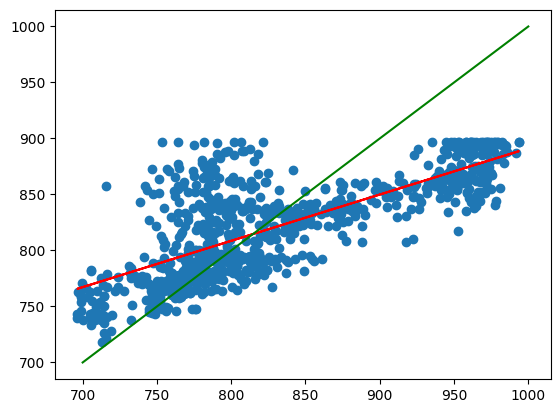

In [ ]:
x=y_test_deno[:,0]
y= test_set_predictions_deno[:,0]

my_list=np.hstack((y_test_deno[:,0], test_set_predictions_deno[:,0]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

j = plt.plot(x, a*x+b, color="red")

d = np.linspace(700, 1000, 1000)
f = d

# Create the plot
k = plt.plot(d, f, color="green")



plt.plot()
plt.show()

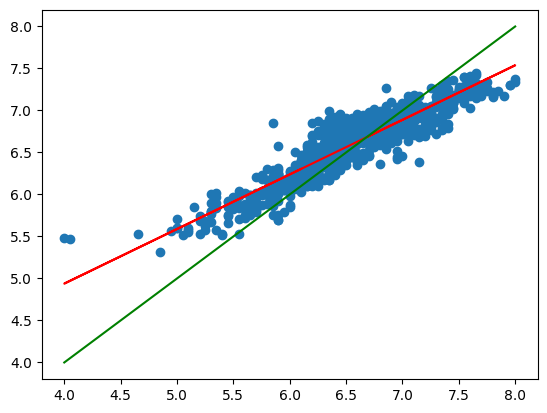

In [ ]:
x=y_test_deno[:,1]
y= test_set_predictions_deno[:,1]

my_list=np.hstack((y_test_deno[:,1], test_set_predictions_deno[:,1]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(4, 8, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")


plt.plot()
plt.show()

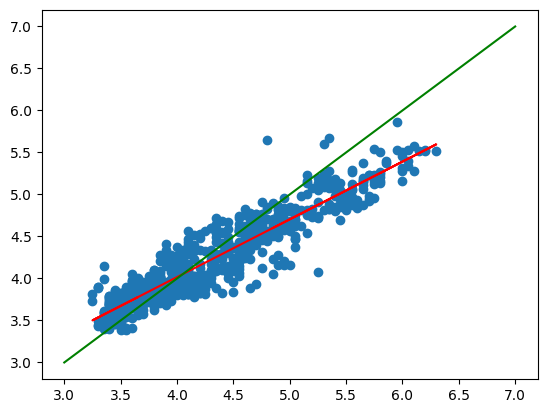

In [ ]:
x=y_test_deno[:,2]
y= test_set_predictions_deno[:,2]

my_list=np.hstack((y_test_deno[:,2], test_set_predictions_deno[:,2]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(3, 7, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")

plt.plot()
plt.show()

NEURAL NETWORK- month day year hour not normalized

In [ ]:

dataset_nn=pd.read_excel(r"/content/drive/MyDrive/SEMİ NORMALIZED DATA-building (1).xlsx")

dataset_nn=np.array(dataset_nn)

dataset_nn=np.array(dataset_nn[:2926,:])
print(dataset_nn)

[[9.0 1.0 89.0 ... 0.1960484364 0.9 0.03278688525]
 [9.0 1.0 89.0 ... 0.197642588 0.8875 0.04918032787]
 [9.0 1.0 89.0 ... 0.1970145889 0.8875 0.04918032787]
 ...
 [12.0 31.0 89.0 ... 0.0922192522 0.4625 0.6557377049]
 [12.0 31.0 89.0 ... 0.09841873048 0.475 0.6885245902]
 [12.0 31.0 89.0 ... 0.09890180671 0.475 0.737704918]]


In [ ]:

dataset.iloc[:,0:4]

In [ ]:
data=np.array(dataset)

n=data.shape[0]
d=data.shape[1]
print(n)
print(d)
dataset=pd.DataFrame(dataset)
normalized_data=np.zeros((n,d))

for i in range(n):
  for j in range(4,d):
    normalized_data[i,j]=2*((data[i,j]-np.min(data[:,j]))/(np.max(data[:,j])-np.min(data[:,j])))-1

normalized_data[:, 4:]

normalized_data=np.hstack((dataset.iloc[:,0:4], normalized_data[:, 4:]))

new_set= pd.DataFrame(normalized_data, columns = dataset.columns)
new_set

In [ ]:
dataset_nn[:2926, 0:4]
dataset_nn[:2926, 11:18]
seminorma_dataset=np.hstack((dataset_nn[:2926, 0:4], dataset_nn[:2926, 11:18]))
print(seminorma_dataset)

[[9.0 1.0 89.0 ... 0.1960484364 0.9 0.03278688525]
 [9.0 1.0 89.0 ... 0.197642588 0.8875 0.04918032787]
 [9.0 1.0 89.0 ... 0.1970145889 0.8875 0.04918032787]
 ...
 [12.0 31.0 89.0 ... 0.0922192522 0.4625 0.6557377049]
 [12.0 31.0 89.0 ... 0.09841873048 0.475 0.6885245902]
 [12.0 31.0 89.0 ... 0.09890180671 0.475 0.737704918]]


In [ ]:
#new_set = np.asarray(new_set)
dataset=np.array(dataset)
x1, y1 = seminorma_dataset[:, 0:8], seminorma_dataset[:, 8:13]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)

# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0, shuffle=False)   #30% test data, 70% training data

print(x_train.shape)
print(y_train.shape)


print(x_train)
print(y_train)

(2048, 8)
(2048, 3)
[[9.0000000e+00 1.0000000e+00 8.9000000e+01 ... 8.2882881e-01
  6.8246078e-04 3.9278349e-01]
 [9.0000000e+00 1.0000000e+00 8.9000000e+01 ... 8.4234232e-01
  6.8246078e-04 4.0927836e-01]
 [9.0000000e+00 1.0000000e+00 8.9000000e+01 ... 8.7387389e-01
  6.8246078e-04 3.9793813e-01]
 ...
 [1.1000000e+01 2.5000000e+01 8.9000000e+01 ... 5.2252251e-01
  1.6574047e-03 1.6649485e-01]
 [1.1000000e+01 2.5000000e+01 8.9000000e+01 ... 5.2702701e-01
  1.7938968e-02 1.8298969e-01]
 [1.1000000e+01 2.5000000e+01 8.9000000e+01 ... 5.4054052e-01
  1.2479282e-01 2.0257732e-01]]
[[0.19604844 0.9        0.03278688]
 [0.1976426  0.8875     0.04918033]
 [0.19701459 0.8875     0.04918033]
 ...
 [0.278268   0.55       0.40983605]
 [0.25881615 0.5625     0.39344263]
 [0.2700074  0.5625     0.39344263]]


weightlere limit ekleme- saturation  


In [ ]:
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation='relu'))
model.add(Dense(8, input_shape=(8,), activation='relu'))
model.add(Dense(8, input_shape=(8,), activation='relu'))

model.add(Dense(3))
model.compile(loss='mse', optimizer='sgd')


weightsBiasDict = {}

weightAndBiasCallback = tf.keras.callbacks.LambdaCallback \
            (on_epoch_end=lambda epoch, logs: weightsBiasDict.update({epoch:model.get_weights()}))

print(weightsBiasDict)


history= model.fit(x_train, y_train, epochs=20, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True, callbacks=weightAndBiasCallback)



model.summary()

{}
Epoch 1/20
359/359 - 2s - loss: 192757813352190210266365952.0000 - val_loss: 21949704662473292906496.0000 - 2s/epoch - 4ms/step
Epoch 2/20
359/359 - 1s - loss: 4572341446182772408320.0000 - val_loss: 180155103356399910912.0000 - 1s/epoch - 3ms/step
Epoch 3/20
359/359 - 1s - loss: 37528038298041188352.0000 - val_loss: 1478640966658162688.0000 - 1s/epoch - 3ms/step
Epoch 4/20
359/359 - 1s - loss: 308015675576680448.0000 - val_loss: 12136131248259072.0000 - 1s/epoch - 3ms/step
Epoch 5/20
359/359 - 1s - loss: 2528071169081344.0000 - val_loss: 99608587927552.0000 - 715ms/epoch - 2ms/step
Epoch 6/20
359/359 - 1s - loss: 20749400145920.0000 - val_loss: 817545805824.0000 - 721ms/epoch - 2ms/step
Epoch 7/20
359/359 - 1s - loss: 170303045632.0000 - val_loss: 6710088704.0000 - 824ms/epoch - 2ms/step
Epoch 8/20
359/359 - 1s - loss: 1397779456.0000 - val_loss: 55072500.0000 - 818ms/epoch - 2ms/step
Epoch 9/20
359/359 - 1s - loss: 11472408.0000 - val_loss: 451898.9375 - 723ms/epoch - 2ms/step
Epo

In [ ]:
model.layers[0].get_weights()[0]

array([[-2.7135128e-01, -2.6326698e+01, -2.6811880e-01, -4.8372281e-01,
        -3.7360466e-01, -1.8375584e+01, -1.7029706e+21, -6.2321943e+21],
       [-5.3993410e-01, -3.3719128e+01,  5.9613758e-01,  5.3368360e-01,
         5.6394309e-01, -2.2335249e+01, -2.9481430e+21, -1.0789029e+22],
       [ 3.5140008e-01, -2.6120462e+02, -4.7314811e-01,  6.1156434e-01,
        -3.2241717e-01, -1.7507684e+02, -1.6339889e+22, -5.9797485e+22],
       [-3.9996558e-01, -3.4085544e+03, -3.3591977e-01, -5.1405424e-01,
        -1.6177902e-01, -2.2876267e+03, -3.1314523e+23, -1.1459868e+24],
       [-3.0512670e-01, -2.0709414e+00,  2.3467672e-01, -4.2015955e-01,
        -9.4708323e-02, -2.0552919e+00, -1.5128098e+20, -5.5362817e+20],
       [-3.2913685e-01, -1.2194747e+00, -1.2488046e-01, -3.2251745e-01,
         1.0623789e-01, -1.2667724e+00, -4.5845074e+19, -1.6777471e+20],
       [ 1.1432344e-01, -1.6008686e+00, -5.9781438e-01,  5.7392734e-01,
        -4.5957559e-01, -8.5904580e-01, -5.3541994e+19, -1

In [ ]:
# evaluate on test set
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


#print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

print(y_train)
print(train_set_predictions)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)



28/28 [==============================] - 0s 2ms/step
Test R2 square: -4.086051116307963
Test MAE:  0.30888268
Test MSE:  0.12359347
64/64 [==============================] - 0s 2ms/step
[[0.19604844 0.9        0.03278688]
 [0.1976426  0.8875     0.04918033]
 [0.19701459 0.8875     0.04918033]
 ...
 [0.278268   0.55       0.40983605]
 [0.25881615 0.5625     0.39344263]
 [0.2700074  0.5625     0.39344263]]
[[0.48080036 0.7363359  0.15223826]
 [0.48080036 0.7363359  0.15223826]
 [0.48080036 0.7363359  0.15223826]
 ...
 [0.48080036 0.7363359  0.15223826]
 [0.48080036 0.7363359  0.15223826]
 [0.48080036 0.7363359  0.15223826]]
Train R2 square: -0.0671080293802544
Train MAE:  0.13618614
Train MSE:  0.030826451



WBE- output 1


In [ ]:
mae=metrics.mean_absolute_error(y_test[:,0], test_set_predictions[:,0])
mse_wbe2=metrics.mean_squared_error(y_test[:,0], test_set_predictions[:,0])
r2=metrics.r2_score(y_test[:,0], test_set_predictions[:,0])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbe2)

Test R2 square: -0.1095046601385139
Test MAE:  0.23269399
Test MSE:  0.073745705


WBCW - output 2

In [ ]:
mae=metrics.mean_absolute_error(y_test[:,1], test_set_predictions[:,1])
mse_wbcw2=metrics.mean_squared_error(y_test[:,1], test_set_predictions[:,1])
r2=metrics.r2_score(y_test[:,1], test_set_predictions[:,1])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbcw2)

Test R2 square: -6.812465013771523
Test MAE:  0.26963934
Test MSE:  0.08325249


WBHW- output 3

In [ ]:
mae=metrics.mean_absolute_error(y_test[:,2], test_set_predictions[:,2])
mse_wbhw2=metrics.mean_squared_error(y_test[:,2], test_set_predictions[:,2])
r2=metrics.r2_score(y_test[:,2], test_set_predictions[:,2])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbhw2)

Test R2 square: -5.336183631450393
Test MAE:  0.4243143
Test MSE:  0.21378255


In [ ]:
n=y_test.shape[0]
print(n)
dataset=pd.DataFrame(dataset)
def backnorm(x):
  denormalized_data=np.zeros((n,3))
  for i in range(n):
    for j in range(3):

       denormalized_data[i,j]=(x[i,j]+1)/2*(np.max(data[:,8+j]-np.min(data[:,8+j])))+np.min(data[:,8+j])

  return denormalized_data

878


In [ ]:
test_set_predictions_deno= backnorm(test_set_predictions)


InvalidIndexError: ignored

In [ ]:
y_test_deno=backnorm(y_test)

InvalidIndexError: ignored

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,1], marker='.', label="actual")
plt.plot(aa, test_set_predictions_deno[:200,1], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBE', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,1], marker='.', label="actual")
plt.plot(aa, test_set_predictions_deno[:200,1], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBCW', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,2], marker='.', label="actual")
plt.plot(aa, test_set_predictions_deno[:200,2], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBHW', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
x=y_test_deno[:,0]
y= test_set_predictions_deno[:,0]

my_list=np.hstack((y_test_deno[:,0], test_set_predictions_deno[:,0]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(700, 1000, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")


plt.plot()
plt.show()

In [ ]:
x=y_test_deno[:,1]
y= test_set_predictions_deno[:,1]

my_list=np.hstack((y_test_deno[:,1], test_set_predictions_deno[:,1]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(4, 8, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")


plt.plot()
plt.show()

In [ ]:
x=y_test_deno[:,2]
y= test_set_predictions_deno[:,2]

my_list=np.hstack((y_test_deno[:,2], test_set_predictions_deno[:,2]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(3, 7, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")

plt.plot()
plt.show()

## **RANDOM FOREST SEMINORMALIZED**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:

dataset_rf=pd.read_excel(r"/content/drive/MyDrive/SEMİ NORMALIZED DATA-building (1).xlsx")
#print(dataset_rf)
dataset_rf=np.array(dataset_rf)

dataset_rf=np.array(dataset_rf[:2926,:])
print(dataset_rf)

[[9.0 1.0 89.0 ... 0.1960484364 0.9 0.03278688525]
 [9.0 1.0 89.0 ... 0.197642588 0.8875 0.04918032787]
 [9.0 1.0 89.0 ... 0.1970145889 0.8875 0.04918032787]
 ...
 [12.0 31.0 89.0 ... 0.0922192522 0.4625 0.6557377049]
 [12.0 31.0 89.0 ... 0.09841873048 0.475 0.6885245902]
 [12.0 31.0 89.0 ... 0.09890180671 0.475 0.737704918]]


In [ ]:
dataset_rf[:2926, 0:4]
dataset_rf[:2926, 11:18]
seminorma_dataset=np.hstack((dataset_rf[:2926, 0:4], dataset_rf[:2926, 11:18]))
print(seminorma_dataset)

[[9.0 1.0 89.0 ... 0.1960484364 0.9 0.03278688525]
 [9.0 1.0 89.0 ... 0.197642588 0.8875 0.04918032787]
 [9.0 1.0 89.0 ... 0.1970145889 0.8875 0.04918032787]
 ...
 [12.0 31.0 89.0 ... 0.0922192522 0.4625 0.6557377049]
 [12.0 31.0 89.0 ... 0.09841873048 0.475 0.6885245902]
 [12.0 31.0 89.0 ... 0.09890180671 0.475 0.737704918]]


In [ ]:

#scaler = MinMaxScaler()

#df = scaler.fit_transform(data)  #conti. formata getiriyor
#dataset = seminorma_dataset

x1, y1 = seminorma_dataset[:, 0:8], seminorma_dataset[:, 8:13] #

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)



In [ ]:
# Splitting the data for training and testing
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

rf_regressor = RandomForestRegressor(n_estimators = 500 ,  random_state = 1)
rf_regressor.fit(x_train,y_train)

#Prediction using test set
y_pred = rf_regressor.predict(x_test)


error = mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

print(error)

print('mse: %.3f' % error)


0.04524100820855312
mse: 0.045


In [ ]:
print(y_test)
print(y_pred)

[[0.9170558  0.675      0.13114753]
 [0.22012174 0.875      0.04918033]
 [0.54539305 0.4375     0.4918033 ]
 ...
 [0.73087823 0.7375     0.24590164]
 [0.29818687 0.55       0.18032786]
 [0.18170108 0.4125     0.8360656 ]]
[[0.85377862 0.67517501 0.15203278]
 [0.25166716 0.87585    0.05347541]
 [0.58350919 0.48195    0.46518032]
 ...
 [0.70465495 0.67407499 0.23340983]
 [0.39441873 0.59074999 0.24678688]
 [0.23683244 0.4135     0.79806557]]


WBE-output 1 mse

In [ ]:
mse_wbe3=metrics.mean_squared_error(y_test[:,0], y_pred[:586,0])

print('Test MSE: ', mse_wbe3)

Test MSE:  0.014841588349254097


WBCW-output 2 mse

In [ ]:
mse_wbcw3=metrics.mean_squared_error(y_test[:,1], y_pred[:586,1])

print('Test MSE: ', mse_wbcw3)

Test MSE:  0.001377095775167087


WBHW-output 3 mse

In [ ]:
mse_wbhw3=metrics.mean_squared_error(y_test[:,2], y_pred[:586,2])

print('Test MSE: ', mse_wbhw3)

Test MSE:  0.002136085901352374


In [ ]:
n=y_test.shape[0]
print(n)
dataset=pd.DataFrame(seminorma_dataset)
def backnorm(x):
  denormalized_data=np.zeros((n,3))
  for i in range(n):
    for j in range(3):

       denormalized_data[i,j]=(x[i,j]+1)/2*(np.max(dataset_rf[:,8+j]-np.min(dataset_rf[:,8+j])))+np.min(dataset_rf[:,8+j])

  return denormalized_data

586


In [ ]:
np.max(dataset_rf[:,16])

1.0

In [ ]:
y_pred_deno_rf= backnorm(y_pred)
#print(y_pred_deno)

In [ ]:
y_pred_deno_rf

array([[949.9368003 ,   6.70070003,   3.71369999],
       [762.9751701 ,   7.50339999,   3.41309999],
       [866.01543811,   5.92779999,   4.66879999],
       ...,
       [903.63240816,   6.69629996,   3.96189999],
       [807.30096071,   6.36299998,   4.00269999],
       [758.36884052,   5.65399999,   5.68409998]])

In [ ]:
y_test_deno_rf=backnorm(y_test)
#print(y_test_deno)

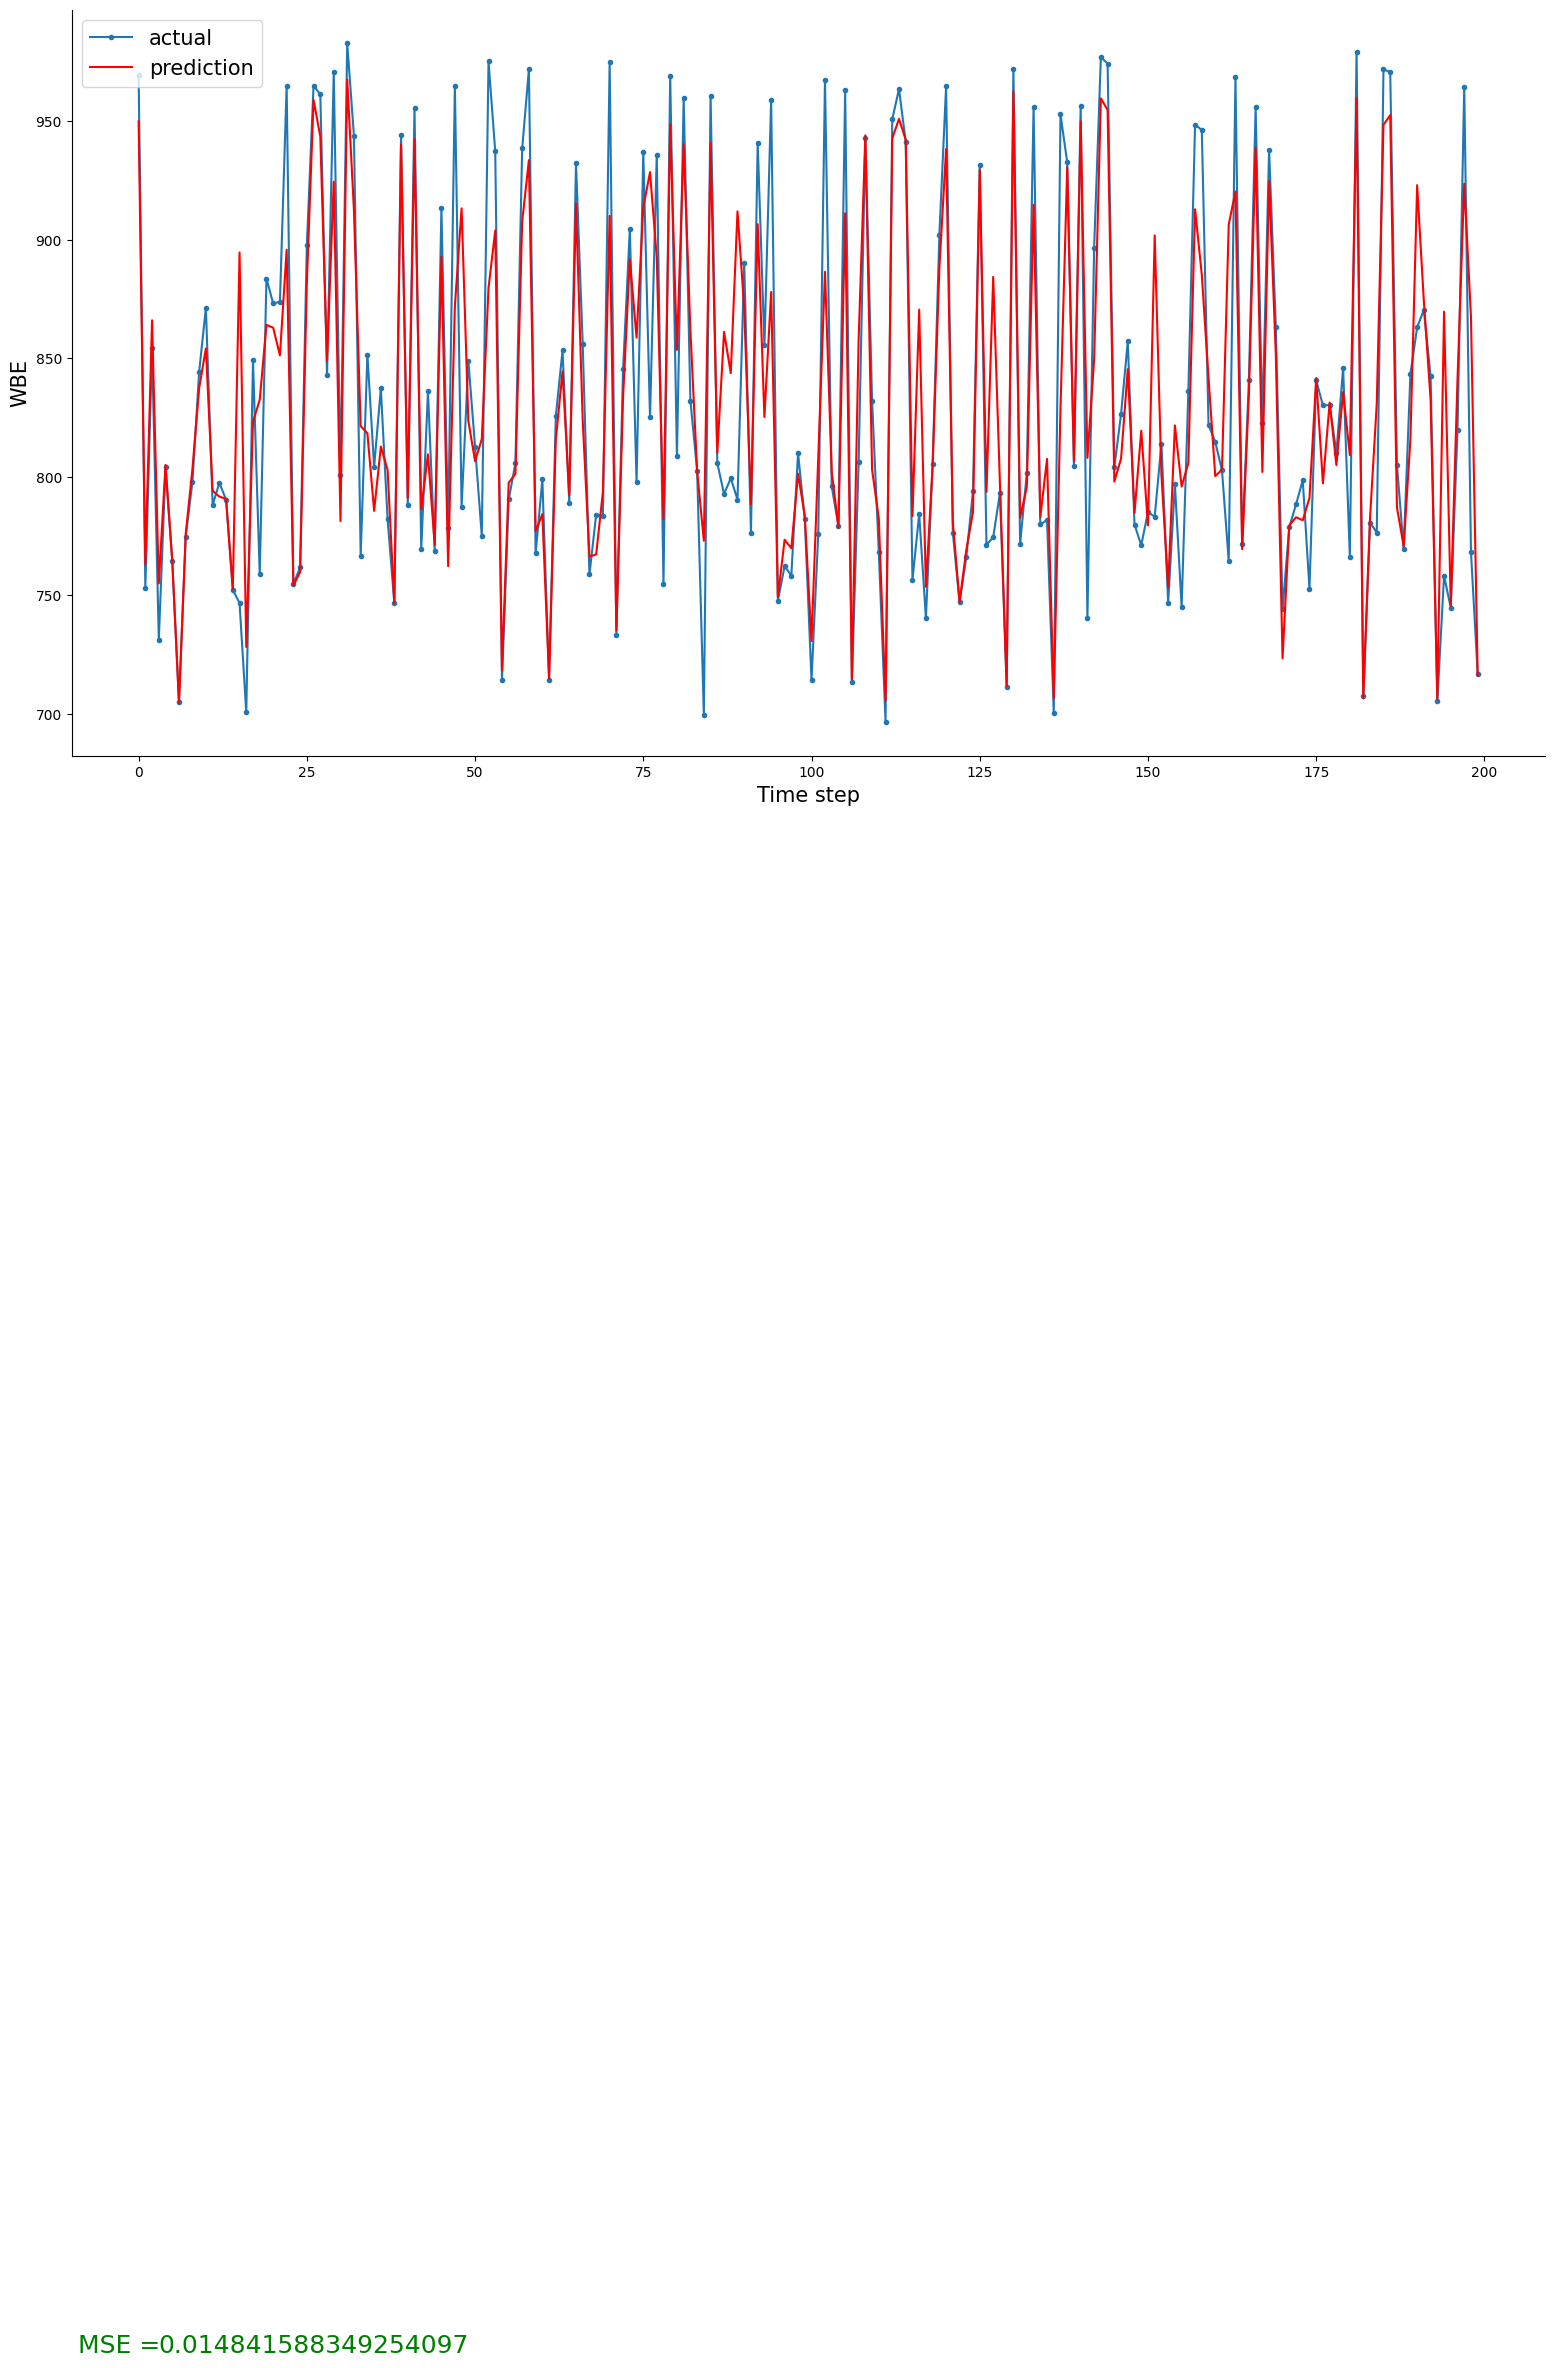

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno_rf[:200,0], marker='.', label="actual")
plt.plot(aa, y_pred_deno_rf[:200,0], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBE', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbe3,
         fontsize = 18, color = 'g')
plt.show();

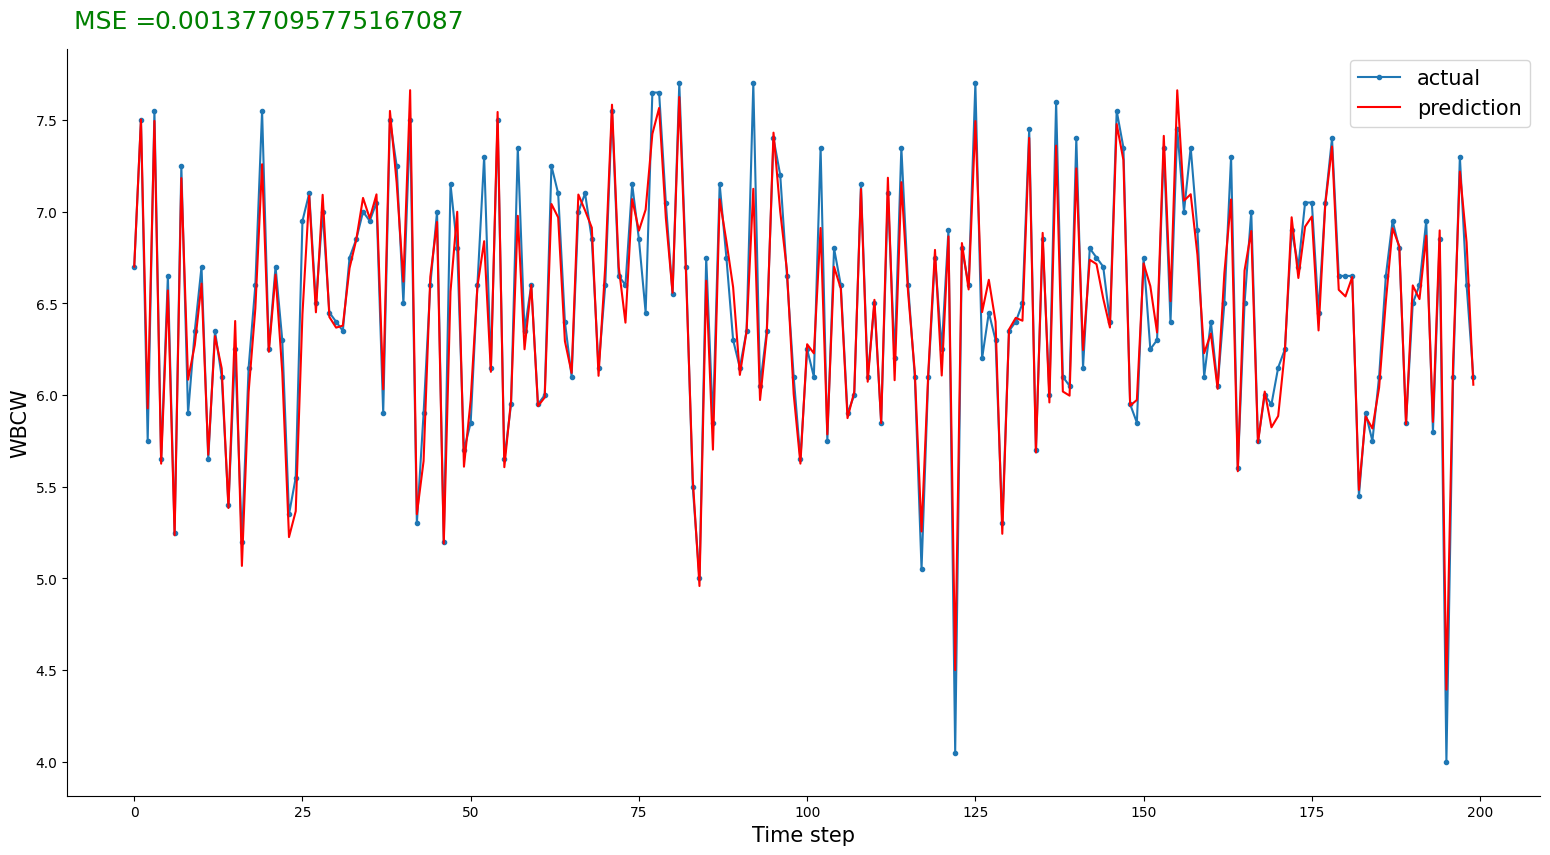

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno_rf[:200,1], marker='.', label="actual")
plt.plot(aa, y_pred_deno_rf[:200,1], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBCW', size=15)
plt.xlabel('Time step', size=15)

plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbcw3,
         fontsize = 18, color = 'g')

plt.legend(fontsize=15)
plt.show();

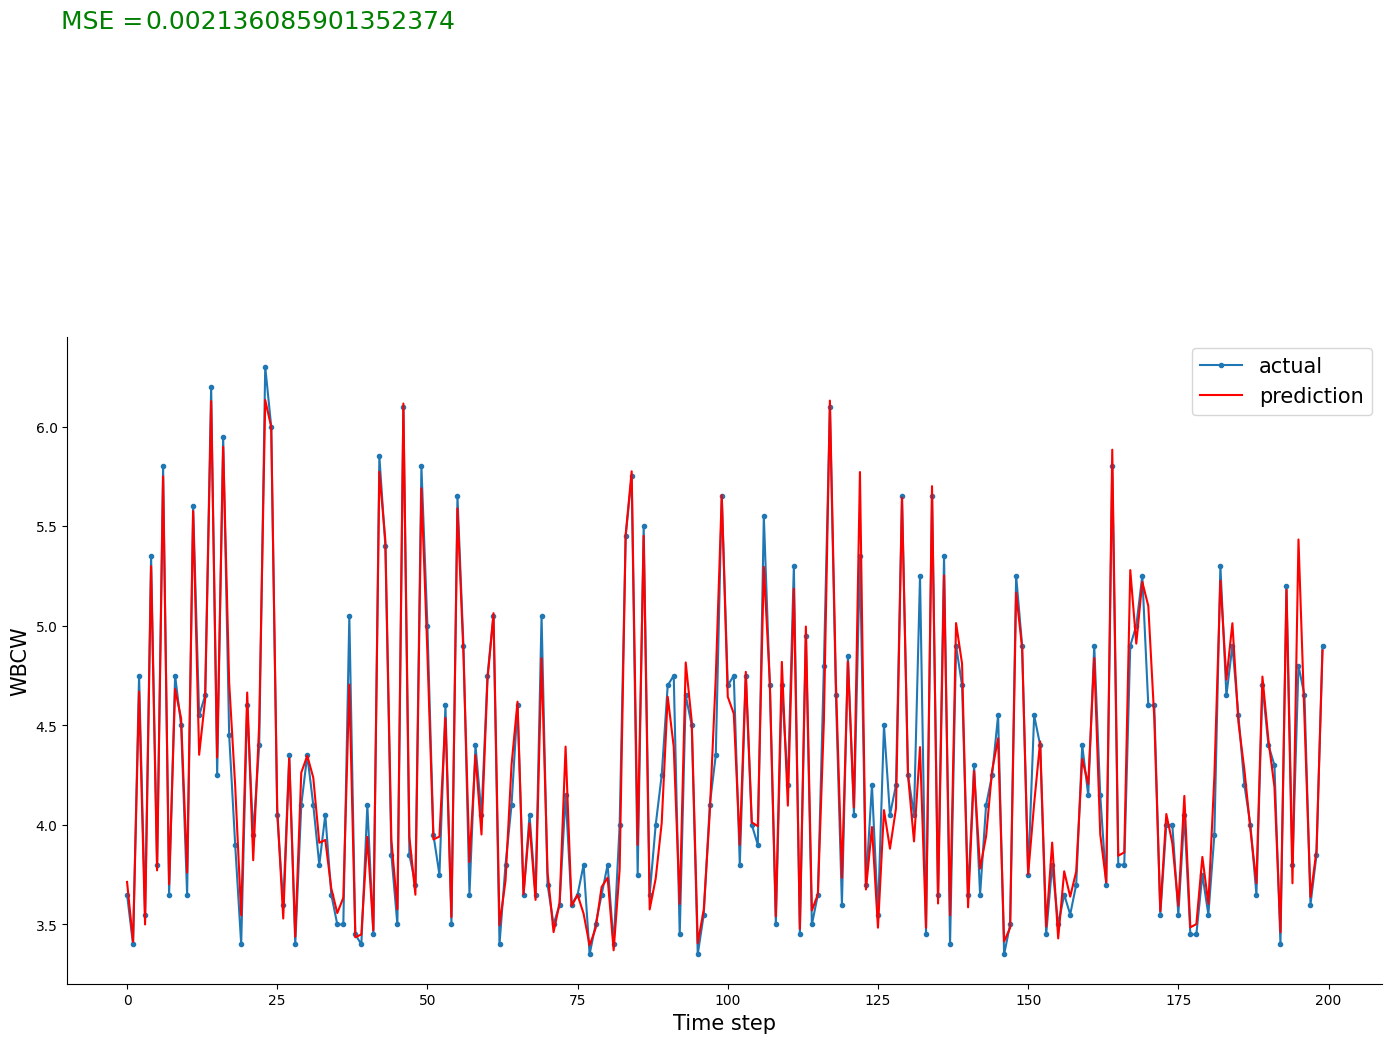

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(14,7))
plt.plot(aa, y_test_deno_rf[:200,2], marker='.', label="actual")
plt.plot(aa, y_pred_deno_rf[:200,2], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.05)
plt.ylabel('WBCW', size=15)
plt.xlabel('Time step', size=15)
plt.xlabel('Time step', size=15)
plt.text(-11, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbhw3,
         fontsize = 18, color = 'g')


plt.legend(fontsize=15)
plt.show();

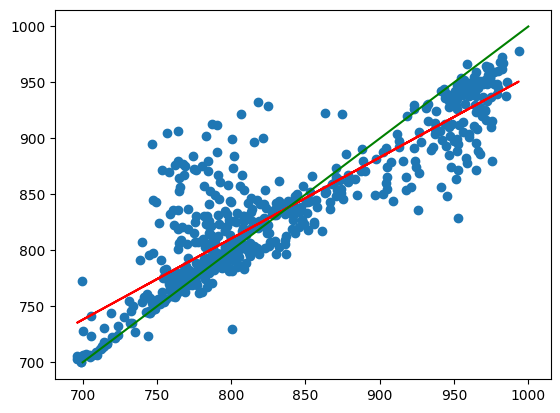

In [ ]:
x=y_test_deno_rf[:,0]
y= y_pred_deno_rf[:,0]

my_list=np.hstack((y_test_deno_rf[:,0], y_pred_deno_rf[:,0]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(700, 1000, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")


plt.plot()
plt.show()

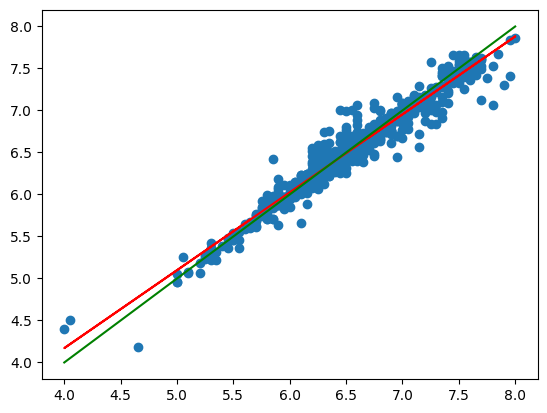

In [ ]:

x=y_test_deno_rf[:,1]
y= y_pred_deno_rf[:,1]

my_list=np.hstack((y_test_deno_rf[:,1], y_pred_deno_rf[:,1]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(4, 8, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")


plt.plot()
plt.show()

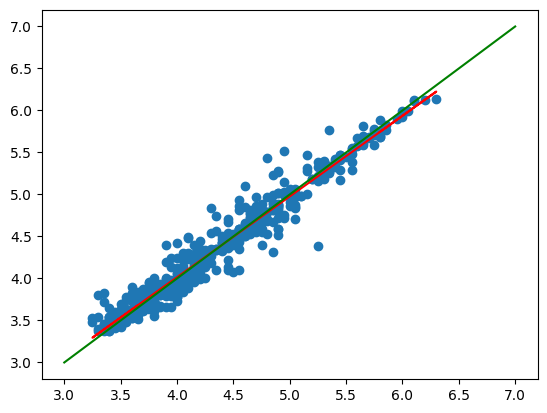

In [ ]:
x=y_test_deno_rf[:,2]
y= y_pred_deno_rf[:,2]

my_list=np.hstack((y_test_deno_rf[:,2], y_pred_deno_rf[:,2]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(3, 7, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")

plt.plot()
plt.show()

## **DECISION TREE**

In [ ]:
#WORKING - DATA

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm




In [ ]:

data=pd.read_excel(r"/content/drive/MyDrive/DATA-building.xlsx")
print(data)


      MONTH  DAY  YEAR  HOUR  TEMP   HUMID  SOLAR  WIND     WBE  WBCW  WBHW
0         9    1    89   200  81.9  0.0184    0.0  7.62  496.07   7.2   0.4
1         9    1    89   300  80.7  0.0187    0.0  7.94  497.06   7.1   0.5
2         9    1    89   400  79.7  0.0194    0.0  7.72  496.67   7.1   0.5
3         9    1    89   500  79.0  0.0197    0.1  6.08  494.54   7.1   0.6
4         9    1    89   600  78.9  0.0199    0.1  5.68  498.09   7.0   0.6
...     ...  ...   ...   ...   ...     ...    ...   ...     ...   ...   ...
2921     12   31    89  1900  47.6  0.0025    1.7  3.66  435.79   3.8   4.4
2922     12   31    89  2000  46.5  0.0026    1.8  2.38  431.14   3.8   4.8
2923     12   31    89  2100  46.1  0.0027    2.0  2.11  431.59   3.7   4.2
2924     12   31    89  2200  46.3  0.0028    2.0  2.34  435.44   3.8   4.4
2925     12   31    89  2300  45.2  0.0028    2.0  3.22  435.74   3.8   4.7

[2926 rows x 11 columns]


In [ ]:

scaler = MinMaxScaler()

df = scaler.fit_transform(data)  #conti. formata getiriyor

dataset = df
# split into input (X) and output (Y) variables
# split into input and output columns
x1, y1 = dataset[:, 0:8], dataset[:, 8:13]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)

# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1,shuffle=True)   #30% test data, 70% training data

print(x_test.shape)
print(y_test.shape)


#print(x_train)
#print(y_train)

(878, 8)
(878, 3)


In [ ]:


dt_regressor = DecisionTreeRegressor(random_state = 1)
dt_regressor.fit(x_train,y_train)
#Predicting using test set
y_pred_test = dt_regressor.predict(x_test)

y_pred_train = dt_regressor.predict(x_train)

In [ ]:
y_test

array([[0.9170558 , 0.675     , 0.13114753],
       [0.22012174, 0.875     , 0.04918033],
       [0.54539305, 0.4375    , 0.4918033 ],
       ...,
       [0.9156871 , 0.7375    , 0.24590164],
       [0.37377217, 0.45      , 0.4262295 ],
       [0.9074265 , 0.525     , 0.52459013]], dtype=float32)

In [ ]:
mae=metrics.mean_absolute_error(y_test, y_pred_test)
mse=metrics.mean_squared_error(y_test, y_pred_test)
r2=metrics.r2_score(y_test, y_pred_test)

#print(y_pred-y_test)

# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

#Prediction using training set
y_pred = dt_regressor.predict(x_train)
mae=metrics.mean_absolute_error(y_train, y_pred_train)
mse=metrics.mean_squared_error(y_train, y_pred_train)
r2=metrics.r2_score(y_train, y_pred_train)




# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

Test R2 square: 0.8251467445868087
Test MAE:  0.04832573296804895
Test MSE:  0.009142265898911248
Train R2 square: 1.0
Train MAE:  0.0
Train MSE:  0.0


In [ ]:
mae=metrics.mean_absolute_error(y_test[:,0], y_pred_test[:,0])
mse_wbe=metrics.mean_squared_error(y_test[:,0], y_pred_test[:,0])
r2=metrics.r2_score(y_test[:,0], y_pred_test[:,0])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbe)

Test R2 square: 0.6725832510713701
Test MAE:  0.07274335698735877
Test MSE:  0.020582846477430777


In [ ]:
mae=metrics.mean_absolute_error(y_test[:,1], y_pred_test[:,1])
mse_wbcw=metrics.mean_squared_error(y_test[:,1],y_pred_test[:,1])
r2=metrics.r2_score(y_test[:,1], y_pred_test[:,1])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbcw)

Test R2 square: 0.8832824383169169
Test MAE:  0.031548976222507165
Test MSE:  0.0027598236336860856


In [ ]:
mae=metrics.mean_absolute_error(y_test[:,2], y_pred_test[:,2])
mse_wbhw=metrics.mean_squared_error(y_test[:,2], y_pred_test[:,2])
r2=metrics.r2_score(y_test[:,2], y_pred_test[:,2])
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbhw)

Test R2 square: 0.919574542078749
Test MAE:  0.04068486569428091
Test MSE:  0.004084127585617042


In [ ]:
n=y_test.shape[0]
print(n)
dataset=pd.DataFrame(dataset)
def backnorm(x):
  denormalized_data=np.zeros((n,3))
  for i in range(n):
    for j in range(3):

       denormalized_data[i,j]=(x[i,j]+1)/2*(np.max(data.iloc[:,8+j]-np.min(data.iloc[:,8+j])))+np.min(data.iloc[:,8+j])

  return denormalized_data

878


In [ ]:
y_pred_test_deno= backnorm(y_pred_test)


In [ ]:
y_test_deno=backnorm(y_test)

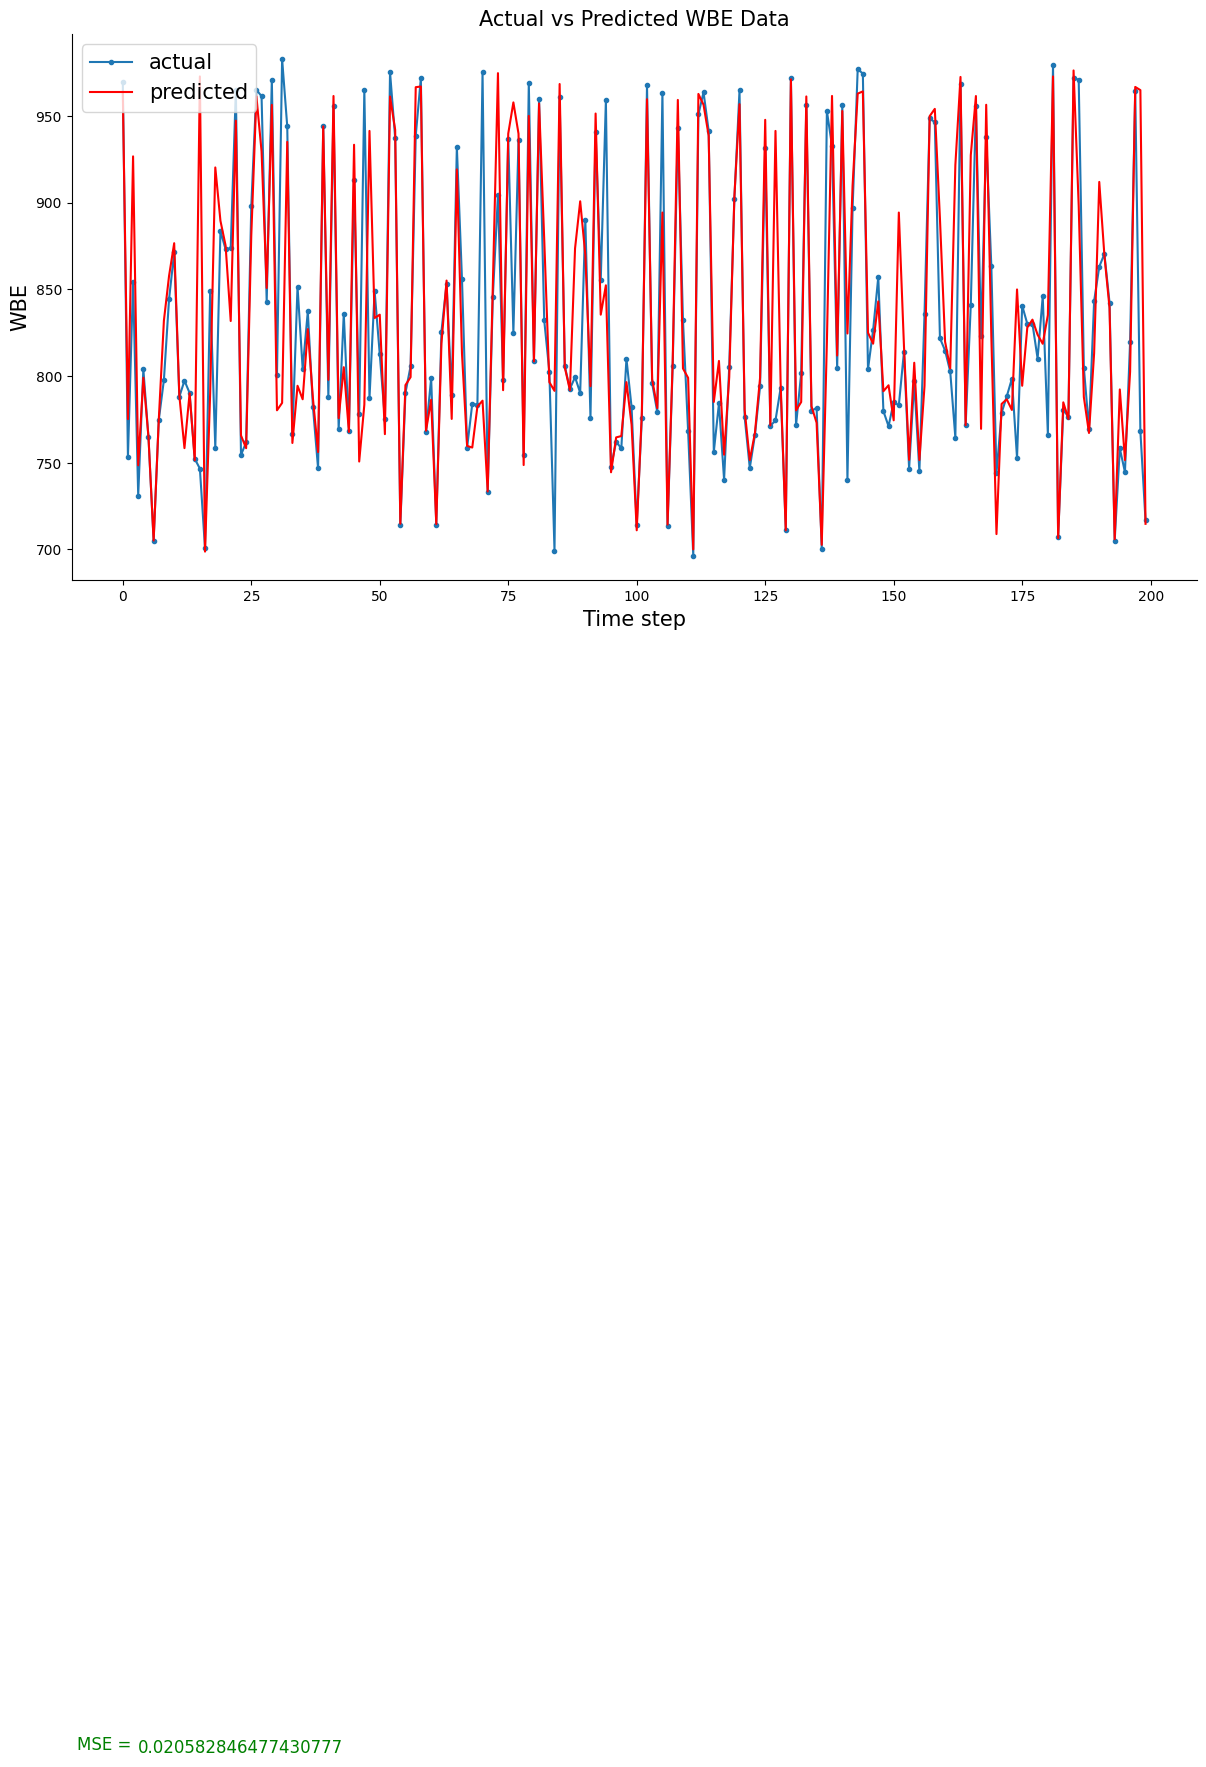

In [ ]:


aa=[x for x in range(200)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test_deno[:200,0], marker='.', label="actual")
plt.plot(aa, y_pred_test_deno[:200,0], 'r', label="predicted")

plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.05)
plt.ylabel('WBE', size=15)
plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 12, color = 'g')
plt.text(3, 6, mse_wbe,
         fontsize = 12, color = 'g')
plt.title("Actual vs Predicted WBE Data", fontsize =15)
plt.legend(fontsize=15)


plt.show();

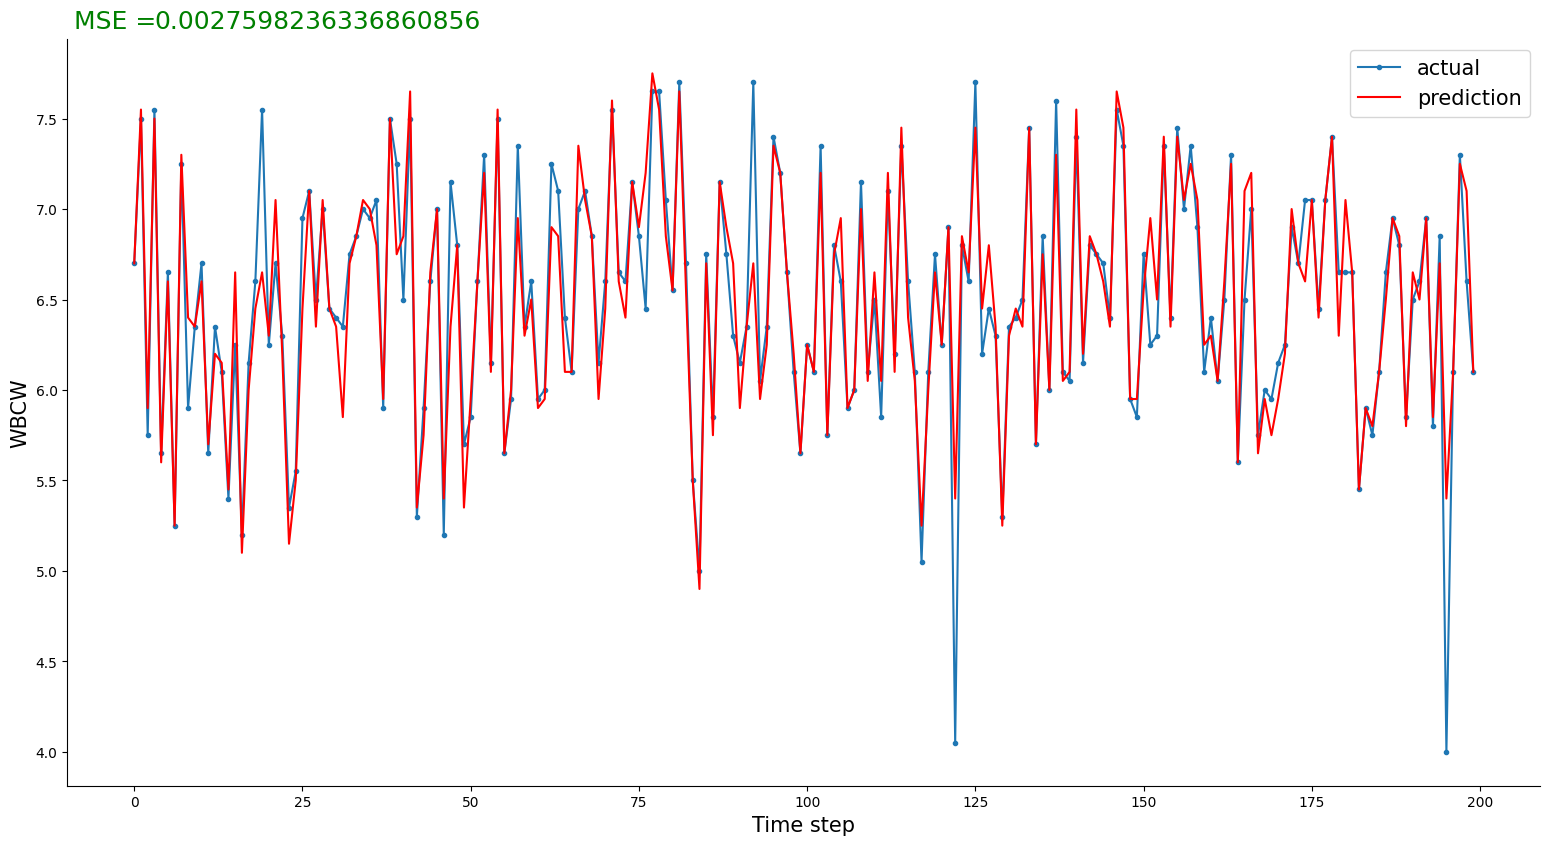

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,1], marker='.', label="actual")
plt.plot(aa, y_pred_test_deno[:200,1], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBCW', size=15)
plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbcw,
         fontsize = 18, color = 'g')
plt.legend(fontsize=15)
plt.show();

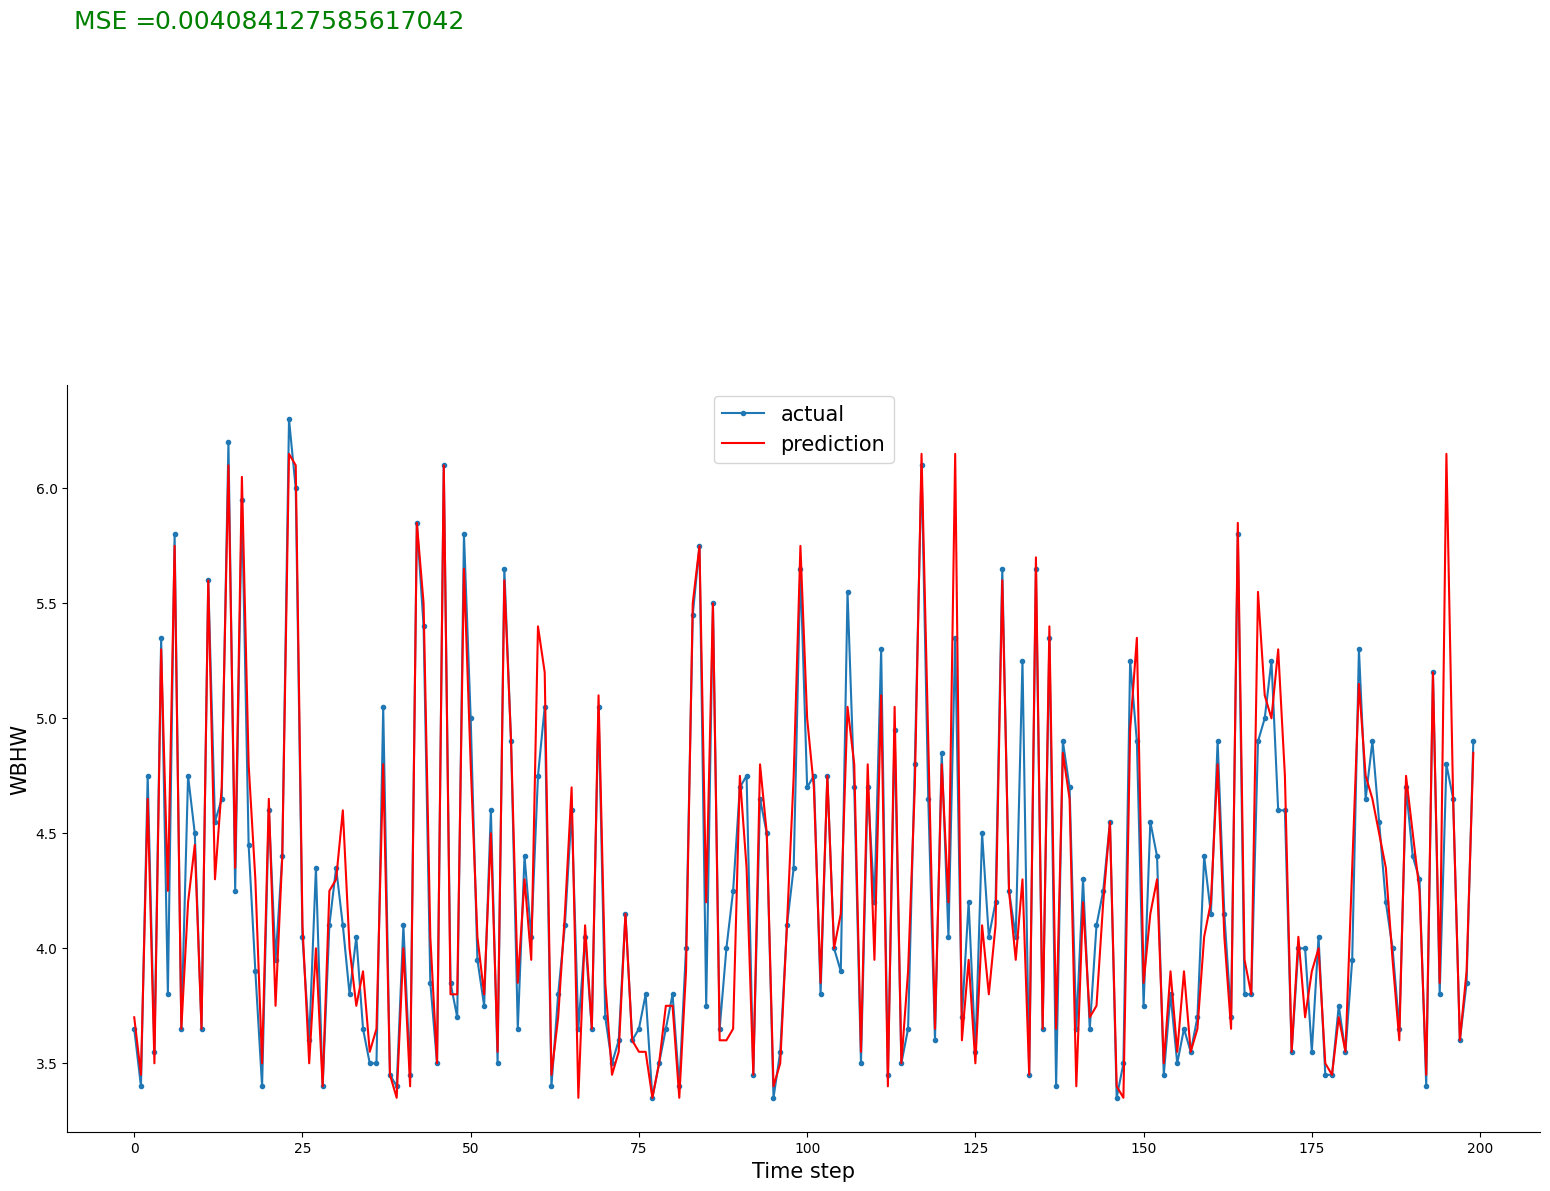

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,2], marker='.', label="actual")
plt.plot(aa, y_pred_test_deno[:200,2], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBHW', size=15)
plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbhw,
         fontsize = 18, color = 'g')
plt.legend(fontsize=15)
plt.show();

## **RANDOM FOREST ALL NORMALIZED**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:

dataset=pd.read_excel(r"/content/drive/MyDrive/DATA-building.xlsx")
print(dataset)


      MONTH  DAY  YEAR  HOUR  TEMP   HUMID  SOLAR  WIND     WBE  WBCW  WBHW
0         9    1    89   200  81.9  0.0184    0.0  7.62  496.07   7.2   0.4
1         9    1    89   300  80.7  0.0187    0.0  7.94  497.06   7.1   0.5
2         9    1    89   400  79.7  0.0194    0.0  7.72  496.67   7.1   0.5
3         9    1    89   500  79.0  0.0197    0.1  6.08  494.54   7.1   0.6
4         9    1    89   600  78.9  0.0199    0.1  5.68  498.09   7.0   0.6
...     ...  ...   ...   ...   ...     ...    ...   ...     ...   ...   ...
2921     12   31    89  1900  47.6  0.0025    1.7  3.66  435.79   3.8   4.4
2922     12   31    89  2000  46.5  0.0026    1.8  2.38  431.14   3.8   4.8
2923     12   31    89  2100  46.1  0.0027    2.0  2.11  431.59   3.7   4.2
2924     12   31    89  2200  46.3  0.0028    2.0  2.34  435.44   3.8   4.4
2925     12   31    89  2300  45.2  0.0028    2.0  3.22  435.74   3.8   4.7

[2926 rows x 11 columns]


In [ ]:

scaler = MinMaxScaler()

df = scaler.fit_transform(dataset)  #conti. formata getiriyor

dataset = df

x1, y1 = dataset[:, 0:8], dataset[:, 8:13] #

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)



In [ ]:
df

array([[0.        , 0.        , 0.        , ..., 0.19604844, 0.9       ,
        0.03278689],
       [0.        , 0.        , 0.        , ..., 0.19764259, 0.8875    ,
        0.04918033],
       [0.        , 0.        , 0.        , ..., 0.19701459, 0.8875    ,
        0.04918033],
       ...,
       [1.        , 1.        , 0.        , ..., 0.09221925, 0.4625    ,
        0.6557377 ],
       [1.        , 1.        , 0.        , ..., 0.09841873, 0.475     ,
        0.68852459],
       [1.        , 1.        , 0.        , ..., 0.09890181, 0.475     ,
        0.73770492]])

In [ ]:
# Splitting the data for training and testing
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

rf_regressor = RandomForestRegressor(n_estimators = 500 ,  random_state = 1)
rf_regressor.fit(x_train,y_train)

#Prediction using test set
y_pred = rf_regressor.predict(x_test)


error = mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

print(error)

print('mse: %.3f' % error)


In [ ]:
mse_wbe3=metrics.mean_squared_error(y_test[:,0], y_pred[:586,0])

print('Test MSE: ', mse_wbe3)

Test MSE:  0.0148585637898809


In [ ]:
mse_wbcw3=metrics.mean_squared_error(y_test[:,1], y_pred[:586,1])

print('Test MSE: ', mse_wbcw3)

Test MSE:  0.0013641070616641955


In [ ]:
mse_wbhw3=metrics.mean_squared_error(y_test[:,2], y_pred[:586,2])

print('Test MSE: ', mse_wbhw3)

Test MSE:  0.0021614309344210937


In [ ]:
n=y_test.shape[0]
print(n)
dataset=pd.DataFrame(dataset)
def backnorm(x):
  denormalized_data=np.zeros((n,3))
  for i in range(n):
    for j in range(3):

       denormalized_data[i,j]=(x[i,j]+1)/2*(np.max(data.iloc[:,8+j]-np.min(data.iloc[:,8+j])))+np.min(data.iloc[:,8+j])

  return denormalized_data

586


In [ ]:
y_pred_deno= backnorm(y_pred)
#print(y_pred_deno)

In [ ]:
y_test_deno=backnorm(y_test)
#print(y_test_deno)

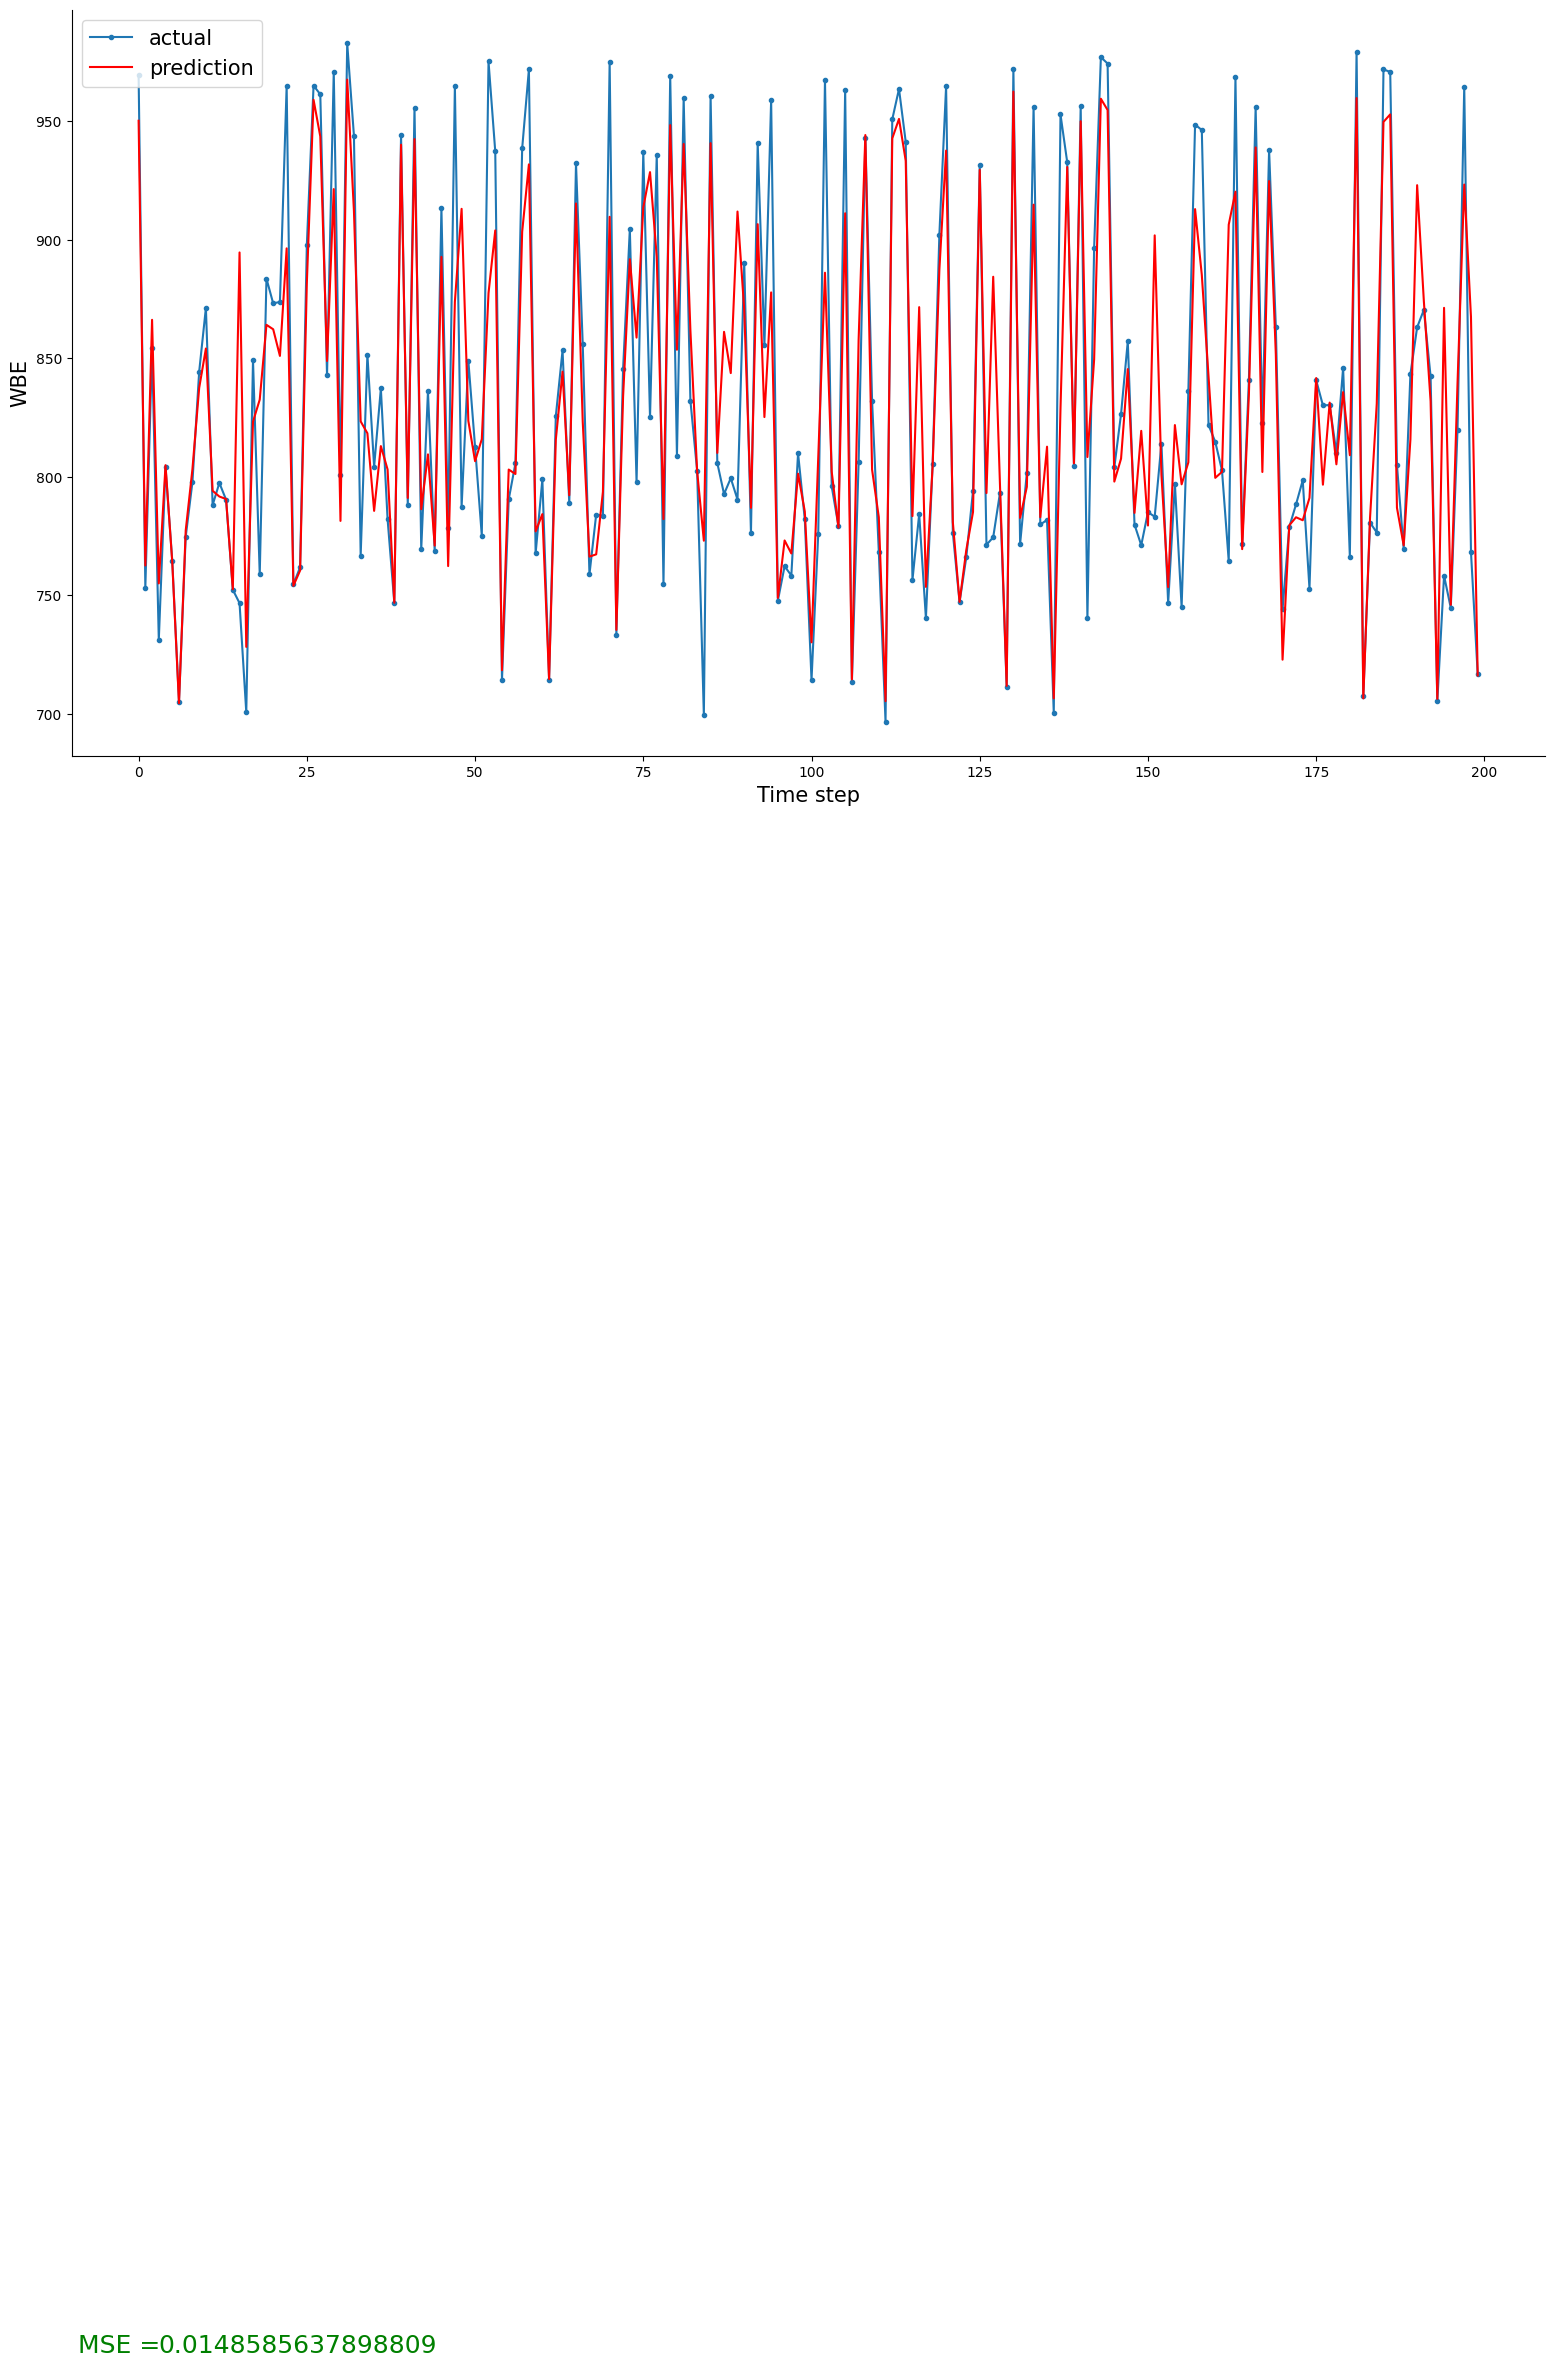

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,0], marker='.', label="actual")
plt.plot(aa, y_pred_deno[:200,0], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBE', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbe3,
         fontsize = 18, color = 'g')
plt.show();

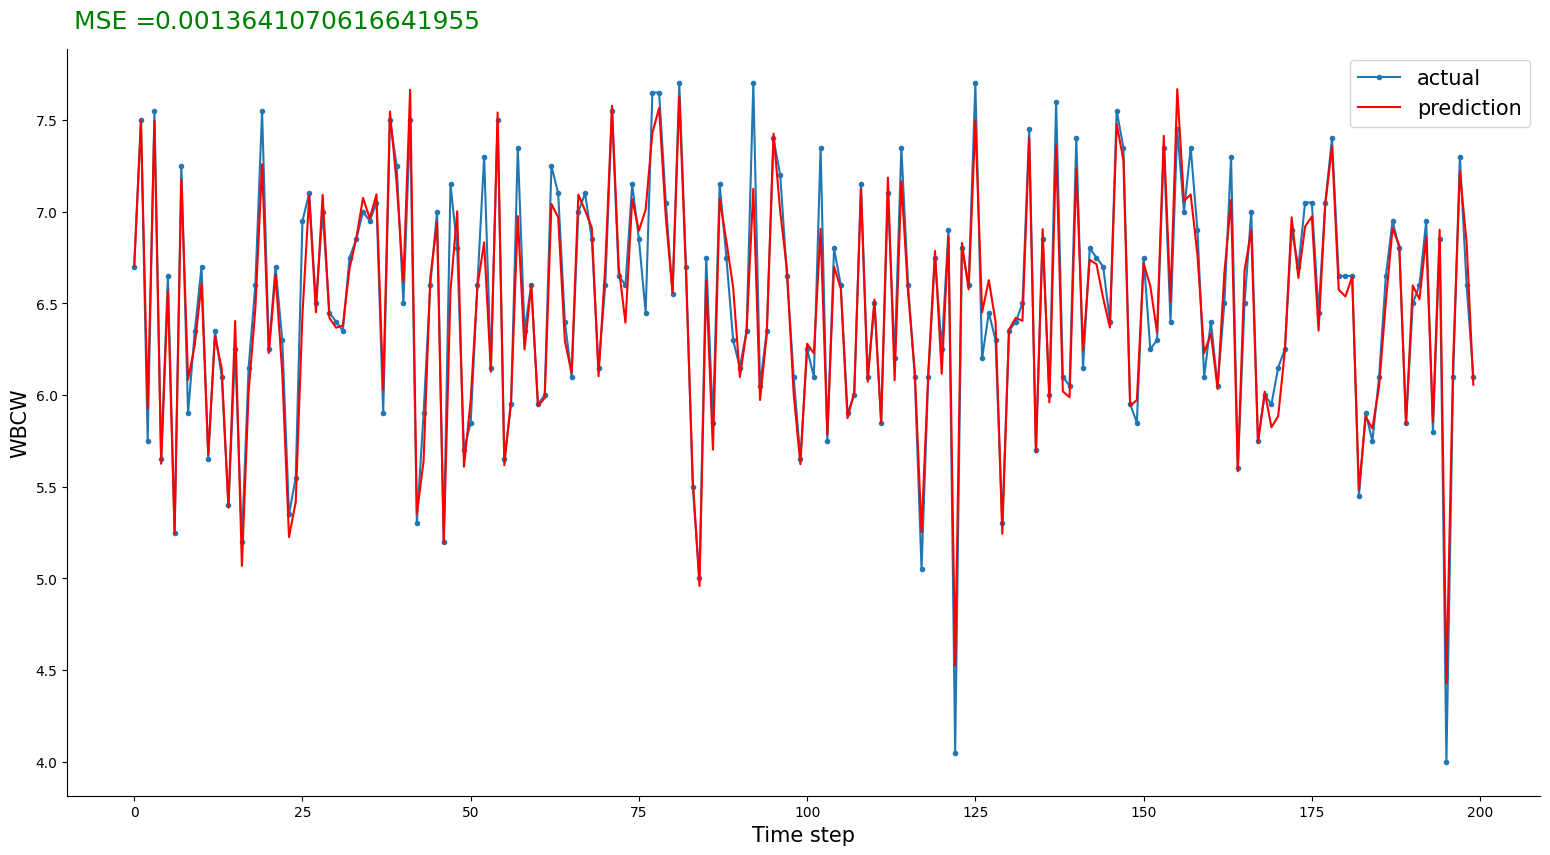

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,1], marker='.', label="actual")
plt.plot(aa, y_pred_deno[:200,1], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBCW', size=15)
plt.xlabel('Time step', size=15)

plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbcw3,
         fontsize = 18, color = 'g')

plt.legend(fontsize=15)
plt.show();

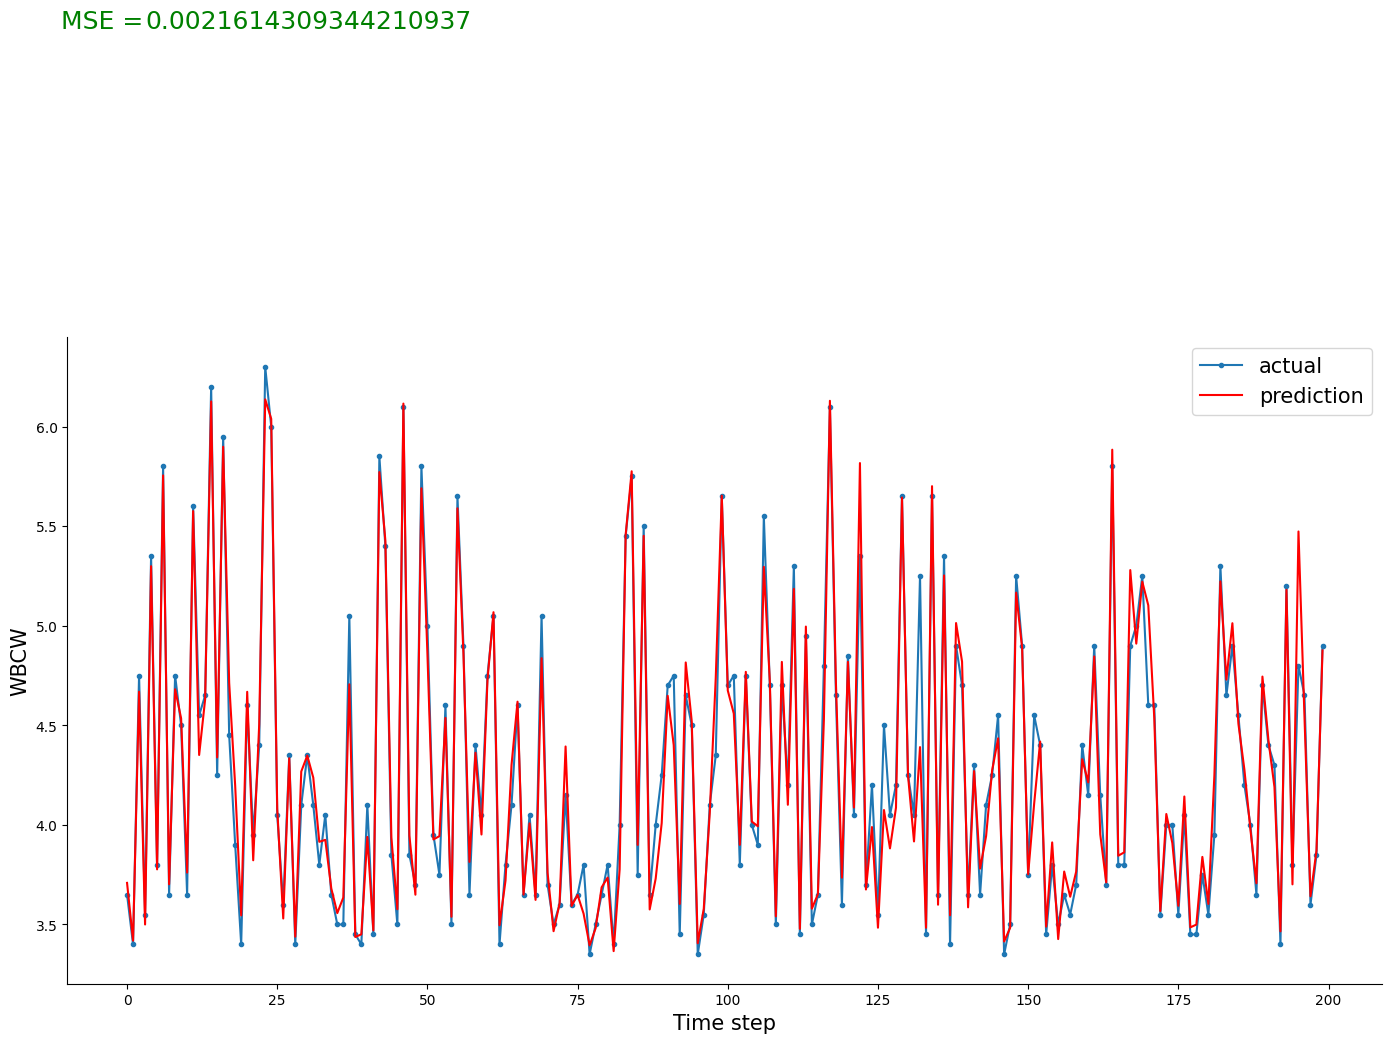

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(14,7))
plt.plot(aa, y_test_deno[:200,2], marker='.', label="actual")
plt.plot(aa, y_pred_deno[:200,2], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.05)
plt.ylabel('WBCW', size=15)
plt.xlabel('Time step', size=15)
plt.xlabel('Time step', size=15)
plt.text(-11, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbhw3,
         fontsize = 18, color = 'g')


plt.legend(fontsize=15)
plt.show();

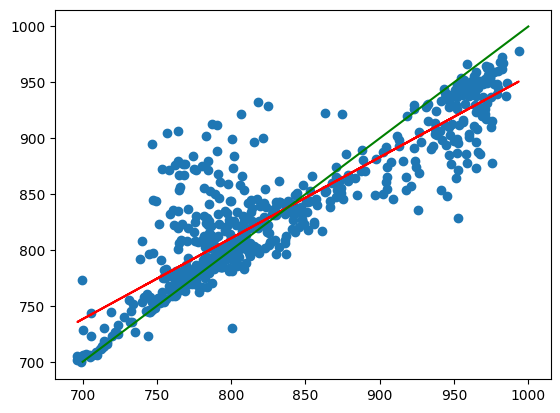

In [ ]:
x=y_test_deno[:,0]
y= y_pred_deno[:,0]

my_list=np.hstack((y_test_deno[:,0], y_pred_deno[:,0]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(700, 1000, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")


plt.plot()
plt.show()

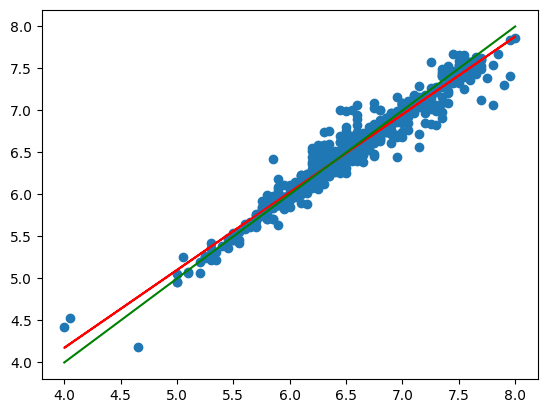

In [ ]:

x=y_test_deno[:,1]
y= y_pred_deno[:,1]

my_list=np.hstack((y_test_deno[:,1], y_pred_deno[:,1]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(4, 8, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")


plt.plot()
plt.show()

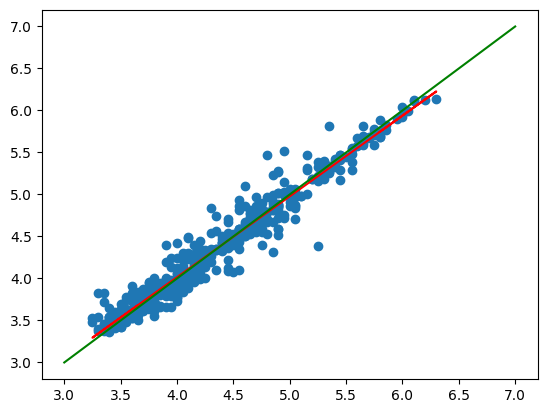

In [ ]:
x=y_test_deno[:,2]
y= y_pred_deno[:,2]

my_list=np.hstack((y_test_deno[:,2], y_pred_deno[:,2]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(3, 7, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")

plt.plot()
plt.show()

CROSS VALIDATION


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [ ]:

dataset=pd.read_excel(r"/content/drive/MyDrive/DATA-building.xlsx")
print(dataset)


      MONTH  DAY  YEAR  HOUR  TEMP   HUMID  SOLAR  WIND     WBE  WBCW  WBHW
0         9    1    89   200  81.9  0.0184    0.0  7.62  496.07   7.2   0.4
1         9    1    89   300  80.7  0.0187    0.0  7.94  497.06   7.1   0.5
2         9    1    89   400  79.7  0.0194    0.0  7.72  496.67   7.1   0.5
3         9    1    89   500  79.0  0.0197    0.1  6.08  494.54   7.1   0.6
4         9    1    89   600  78.9  0.0199    0.1  5.68  498.09   7.0   0.6
...     ...  ...   ...   ...   ...     ...    ...   ...     ...   ...   ...
2921     12   31    89  1900  47.6  0.0025    1.7  3.66  435.79   3.8   4.4
2922     12   31    89  2000  46.5  0.0026    1.8  2.38  431.14   3.8   4.8
2923     12   31    89  2100  46.1  0.0027    2.0  2.11  431.59   3.7   4.2
2924     12   31    89  2200  46.3  0.0028    2.0  2.34  435.44   3.8   4.4
2925     12   31    89  2300  45.2  0.0028    2.0  3.22  435.74   3.8   4.7

[2926 rows x 11 columns]


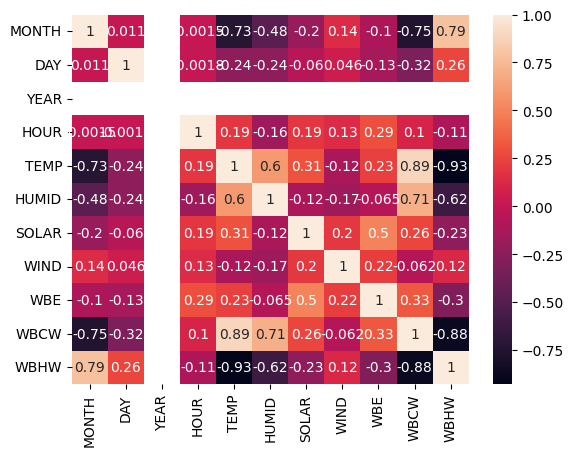

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:

scaler = MinMaxScaler()

df = scaler.fit_transform(dataset)
dataset = df

x1, y1 = dataset[:, 0:8], dataset[:, 8:13]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)



In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold



In [ ]:
testmse=[]
trainmse=[]
los=[]

def optimizer(x_train,y_train,x_test, y_test):


    model = Sequential()
    model.add(Dense(16, input_shape=(8,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, input_shape=(8,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3)) #3'ü 5 yapsak ne olur

    his = tf.keras.callbacks.History()

    model.compile(loss='mse', optimizer='sgd')


    es=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

    history= model.fit(x_train, y_train, epochs=5, batch_size=4, verbose=2, validation_split = 0.3, callbacks=[es, his])

    model.summary()

    # evaluate on test set
    yhat = model.predict(x_test)
    error = mean_squared_error(y_test, yhat)


    #print('MSE: %.3f' % error)

    test_set_predictions = model.predict(x_test)

    mae=metrics.mean_absolute_error(y_test, test_set_predictions)
    mse=metrics.mean_squared_error(y_test, test_set_predictions)
    # Printing the metrics
    print('Test MAE: ', mae)
    print('Test MSE: ', mse)

    testmse.append(mse)

    train_set_predictions = model.predict(x_train)

    print(y_train)
    print(train_set_predictions)

    mae=metrics.mean_absolute_error(y_train, train_set_predictions)
    mse=metrics.mean_squared_error(y_train, train_set_predictions)
    # Printing the metrics
    print('Train MAE: ', mae)
    print('Train MSE: ', mse)

    trainmse.append(mse)


    trainmse.append(mse)


    his.history.keys() # dict_keys(['loss', 'categorical_accuracy'])
    loss1=his.history["loss"]

    los.append(loss1)

X = x1
y = y1
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    optimizer(X_train , y_train , X_test , y_test )


TRAIN: [ 293  294  295 ... 2923 2924 2925] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [ ]:
flat_los = [item for sublist in los for item in sublist]
testmean=mean(testmse)
trainmean=mean(trainmse)
losmean=mean(flat_los)
print(testmean)
print(trainmean)
print(losmean)

0.04854034508078388
0.04256273976516293
0.03744948830455542


In [ ]:
# evaluate on test set
#yhat = model.predict(X_test)
#error = mean_squared_error(y_test, yhat)


#print('MSE: %.3f' % error)

#test_set_predictions = model.predict(X_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(X_train)

print(y_train)
print(train_set_predictions)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)



NameError: ignored

In [ ]:
mae=metrics.mean_absolute_error(y_test[:,0], test_set_predictions[:,0])
mse_wbe=metrics.mean_squared_error(y_test[:,0], test_set_predictions[:,0])
# Printing the metrics
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbe)

mae=metrics.mean_absolute_error(y_test[:,1], test_set_predictions[:,1])
mse_wbcw=metrics.mean_squared_error(y_test[:,1], test_set_predictions[:,1])
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbcw)

mae=metrics.mean_absolute_error(y_test[:,2], test_set_predictions[:,2])
mse_wbhw=metrics.mean_squared_error(y_test[:,2], test_set_predictions[:,2])
print('Test MAE: ', mae)
print('Test MSE: ', mse_wbhw)

NameError: ignored

In [ ]:
n=y_test.shape[0]
print(n)
dataset=pd.DataFrame(dataset)
def backnorm(x):
  denormalized_data=np.zeros((n,3))
  for i in range(n):
    for j in range(3):

       denormalized_data[i,j]=(x[i,j]+1)/2*(np.max(data.iloc[:,8+j]-np.min(data.iloc[:,8+j])))+np.min(data.iloc[:,8+j])

  return denormalized_data

In [ ]:
test_set_predictions_deno= backnorm(test_set_predictions)


In [ ]:
y_test_deno=backnorm(y_test)

In [ ]:
aa=[x for x in range(200)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test_deno[:200,0], marker='.', label="actual")
plt.plot(aa, test_set_predictions_deno[:200,0], 'r', label="predicted")

plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.05)
plt.ylabel('WBE', size=15)
plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 12, color = 'g')
plt.text(3, 6, mse_wbe,
         fontsize = 12, color = 'g')
plt.title("Actual vs Predicted WBE Data", fontsize =15)
plt.legend(fontsize=15)


plt.show();

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,1], marker='.', label="actual")
plt.plot(aa, test_set_predictions_deno[:200,1], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBCW', size=15)
plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbcw,
         fontsize = 18, color = 'g')
plt.legend(fontsize=15)
plt.show();

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, y_test_deno[:200,2], marker='.', label="actual")
plt.plot(aa, test_set_predictions_deno[:200,2], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBHW', size=15)
plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse_wbhw,
         fontsize = 18, color = 'g')
plt.legend(fontsize=15)
plt.show();

In [ ]:
x=y_test_deno[:,0]
y= test_set_predictions_deno[:,0]

my_list=np.hstack((y_test_deno[:,0], test_set_predictions_deno[:,0]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

j = plt.plot(x, a*x+b, color="red")

d = np.linspace(700, 1000, 1000)
f = d

# Create the plot
k = plt.plot(d, f, color="green")



plt.plot()
plt.show()

In [ ]:
x=y_test_deno[:,1]
y= test_set_predictions_deno[:,1]

my_list=np.hstack((y_test_deno[:,1], test_set_predictions_deno[:,1]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(4, 8, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")


plt.plot()
plt.show()

In [ ]:
x=y_test_deno[:,2]
y= test_set_predictions_deno[:,2]

my_list=np.hstack((y_test_deno[:,2], test_set_predictions_deno[:,2]))


a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, a*x+b, color="red")

d = np.linspace(3, 7, 1000)
f = d

# Create the plot
plt.plot(d, f, color="green")

plt.plot()
plt.show()

## **RNN**

In [ ]:

dataset=pd.read_excel(r"/content/drive/MyDrive/DATA-building.xlsx")
print(dataset)

      MONTH  DAY  YEAR  HOUR  TEMP   HUMID  SOLAR  WIND     WBE  WBCW  WBHW
0         9    1    89   200  81.9  0.0184    0.0  7.62  496.07   7.2   0.4
1         9    1    89   300  80.7  0.0187    0.0  7.94  497.06   7.1   0.5
2         9    1    89   400  79.7  0.0194    0.0  7.72  496.67   7.1   0.5
3         9    1    89   500  79.0  0.0197    0.1  6.08  494.54   7.1   0.6
4         9    1    89   600  78.9  0.0199    0.1  5.68  498.09   7.0   0.6
...     ...  ...   ...   ...   ...     ...    ...   ...     ...   ...   ...
2921     12   31    89  1900  47.6  0.0025    1.7  3.66  435.79   3.8   4.4
2922     12   31    89  2000  46.5  0.0026    1.8  2.38  431.14   3.8   4.8
2923     12   31    89  2100  46.1  0.0027    2.0  2.11  431.59   3.7   4.2
2924     12   31    89  2200  46.3  0.0028    2.0  2.34  435.44   3.8   4.4
2925     12   31    89  2300  45.2  0.0028    2.0  3.22  435.74   3.8   4.7

[2926 rows x 11 columns]


In [ ]:
data=np.array(dataset)
n=data.shape[0]
d=data.shape[1]
print(n)
print(d)

2926
11


In [ ]:
dataset.iloc[:,0:4]

MONTH  DAY  YEAR  HOUR
0         9    1    89   200
1         9    1    89   300
2         9    1    89   400
3         9    1    89   500
4         9    1    89   600
...     ...  ...   ...   ...
2921     12   31    89  1900
2922     12   31    89  2000
2923     12   31    89  2100
2924     12   31    89  2200
2925     12   31    89  2300

[2926 rows x 4 columns]

In [ ]:
normalized_data=np.zeros((n,d))

for i in range(n):
  for j in range(4,d):
    normalized_data[i,j]=2*((data[i,j]-np.min(data[:,j]))/(np.max(data[:,j])-np.min(data[:,j])))-1

normalized_data[:, 4:]

normalized_data=np.hstack((data[:,0:4], normalized_data[:, 4:]))

print(normalized_data)


[[ 9.00000000e+00  1.00000000e+00  8.90000000e+01 ... -6.07903127e-01
   8.00000000e-01 -9.34426230e-01]
 [ 9.00000000e+00  1.00000000e+00  8.90000000e+01 ... -6.04714824e-01
   7.75000000e-01 -9.01639344e-01]
 [ 9.00000000e+00  1.00000000e+00  8.90000000e+01 ... -6.05970822e-01
   7.75000000e-01 -9.01639344e-01]
 ...
 [ 1.20000000e+01  3.10000000e+01  8.90000000e+01 ... -8.15561496e-01
  -7.50000000e-02  3.11475410e-01]
 [ 1.20000000e+01  3.10000000e+01  8.90000000e+01 ... -8.03162539e-01
  -5.00000000e-02  3.77049180e-01]
 [ 1.20000000e+01  3.10000000e+01  8.90000000e+01 ... -8.02196387e-01
  -5.00000000e-02  4.75409836e-01]]


In [ ]:
new_set= pd.DataFrame(normalized_data, columns = dataset.columns)
new_set

MONTH   DAY  YEAR    HOUR      TEMP     HUMID     SOLAR      WIND  \
0       9.0   1.0  89.0   200.0  0.636739  0.657658 -0.998635 -0.214433   
1       9.0   1.0  89.0   300.0  0.611971  0.684685 -0.998635 -0.181443   
2       9.0   1.0  89.0   400.0  0.591331  0.747748 -0.998635 -0.204124   
3       9.0   1.0  89.0   500.0  0.576883  0.774775 -0.998440 -0.373196   
4       9.0   1.0  89.0   600.0  0.574819  0.792793 -0.998440 -0.414433   
...     ...   ...   ...     ...       ...       ...       ...       ...   
2921   12.0  31.0  89.0  1900.0 -0.071207 -0.774775 -0.995320 -0.622680   
2922   12.0  31.0  89.0  2000.0 -0.093911 -0.765766 -0.995125 -0.754639   
2923   12.0  31.0  89.0  2100.0 -0.102167 -0.756757 -0.994735 -0.782474   
2924   12.0  31.0  89.0  2200.0 -0.098039 -0.747748 -0.994735 -0.758763   
2925   12.0  31.0  89.0  2300.0 -0.120743 -0.747748 -0.994735 -0.668041   

           WBE   WBCW      WBHW  
0    -0.607903  0.800 -0.934426  
1    -0.604715  0.775 -0.901639  
2    -0.605971  0.775 -0.901639  
3    -0.612831  0.775 -0.868852  
4    -0.601398  0.750 -0.868852  
...        ...    ...       ...  
2921 -0.802035 -0.050  0.377049  
2922 -0.817011 -0.050  0.508197  
2923 -0.815561 -0.075  0.311475  
2924 -0.803163 -0.050  0.377049  
2925 -0.802196 -0.050  0.475410  

[2926 rows x 11 columns]

In [ ]:
input=new_set.iloc[:, 0:8]
output=new_set.iloc[:, 8:]
output

WBE   WBCW      WBHW
0    -0.607903  0.800 -0.934426
1    -0.604715  0.775 -0.901639
2    -0.605971  0.775 -0.901639
3    -0.612831  0.775 -0.868852
4    -0.601398  0.750 -0.868852
...        ...    ...       ...
2921 -0.802035 -0.050  0.377049
2922 -0.817011 -0.050  0.508197
2923 -0.815561 -0.075  0.311475
2924 -0.803163 -0.050  0.377049
2925 -0.802196 -0.050  0.475410

[2926 rows x 3 columns]

In [ ]:

training_set_input=input.iloc[0:int(.7*len(input))]
test_set_input=input.iloc[int(.7*len(input)): -1]

training_set_output=output.iloc[0:int(.7*len(output))]
test_set_output=output.iloc[int(.7*len(output)): -1]

In [ ]:
test_set_output

WBE   WBCW      WBHW
2048 -0.421500  0.150 -0.311475
2049 -0.353741  0.125 -0.311475
2050 -0.295288  0.150 -0.409836
2051 -0.304467  0.150 -0.442623
2052 -0.275353  0.125 -0.442623
...        ...    ...       ...
2920 -0.809958 -0.050  0.180328
2921 -0.802035 -0.050  0.377049
2922 -0.817011 -0.050  0.508197
2923 -0.815561 -0.075  0.311475
2924 -0.803163 -0.050  0.377049

[877 rows x 3 columns]

In [ ]:
print(training_set_input)
print(training_set_output)

      MONTH   DAY  YEAR   HOUR      TEMP     HUMID     SOLAR      WIND
0       9.0   1.0  89.0  200.0  0.636739  0.657658 -0.998635 -0.214433
1       9.0   1.0  89.0  300.0  0.611971  0.684685 -0.998635 -0.181443
2       9.0   1.0  89.0  400.0  0.591331  0.747748 -0.998635 -0.204124
3       9.0   1.0  89.0  500.0  0.576883  0.774775 -0.998440 -0.373196
4       9.0   1.0  89.0  600.0  0.574819  0.792793 -0.998440 -0.414433
...     ...   ...   ...    ...       ...       ...       ...       ...
2043   11.0  25.0  89.0  500.0  0.172343 -0.036036 -0.996685 -0.725773
2044   11.0  25.0  89.0  600.0  0.195046  0.009009 -0.996685 -0.639175
2045   11.0  25.0  89.0  700.0  0.221878  0.045045 -0.996685 -0.667010
2046   11.0  25.0  89.0  800.0  0.226006  0.054054 -0.964122 -0.634021
2047   11.0  25.0  89.0  900.0  0.242518  0.081081 -0.750414 -0.594845

[2048 rows x 8 columns]
           WBE   WBCW      WBHW
0    -0.607903  0.800 -0.934426
1    -0.604715  0.775 -0.901639
2    -0.605971  0.775 -0.90

In [ ]:
print(test_set_input)
print(test_set_output)

      MONTH   DAY  YEAR    HOUR      TEMP     HUMID     SOLAR      WIND
2048   11.0  25.0  89.0  1000.0  0.304438  0.117117 -0.600663 -0.318557
2049   11.0  25.0  89.0  1100.0  0.345717  0.090090 -0.275617 -0.172165
2050   11.0  25.0  89.0  1200.0  0.420021  0.099099 -0.455396 -0.090722
2051   11.0  25.0  89.0  1300.0  0.473684  0.054054 -0.316564 -0.111340
2052   11.0  25.0  89.0  1400.0  0.498452  0.009009 -0.479185 -0.239175
...     ...   ...   ...     ...       ...       ...       ...       ...
2920   12.0  31.0  89.0  1800.0 -0.048504 -0.765766 -0.969387 -0.479381
2921   12.0  31.0  89.0  1900.0 -0.071207 -0.774775 -0.995320 -0.622680
2922   12.0  31.0  89.0  2000.0 -0.093911 -0.765766 -0.995125 -0.754639
2923   12.0  31.0  89.0  2100.0 -0.102167 -0.756757 -0.994735 -0.782474
2924   12.0  31.0  89.0  2200.0 -0.098039 -0.747748 -0.994735 -0.758763

[877 rows x 8 columns]
           WBE   WBCW      WBHW
2048 -0.421500  0.150 -0.311475
2049 -0.353741  0.125 -0.311475
2050 -0.295288  

In [ ]:
def backnorm(x):
  backnormOutput=(x+1)/2*(np.max(data[:,-1]-np.min(data[:,-1])))+np.min(data[:,-1])

  return backnormOutput

In [ ]:
def create_data_sequence(X, y, time_steps=1):

    input_sequence, output = [], []
    for i in range(len(X) - time_steps):
        sequence = X.iloc[i:(i + time_steps)].values
        input_sequence.append(sequence)
        output.append(y.iloc[i + time_steps])
    return np.array(input_sequence), np.array(output)

time_steps = 5

In [ ]:
training_set_output=pd.DataFrame(training_set_output)


In [ ]:
training_set_sequence, training_set_output = create_data_sequence(training_set_input, training_set_output, time_steps)
test_set_sequence, test_set_output = create_data_sequence(test_set_input, test_set_output, time_steps)


In [ ]:
plt(training_set_input)
plt.show()

TypeError: ignored

In [ ]:
training_set_sequence[1]

array([[ 9.00000000e+00,  1.00000000e+00,  8.90000000e+01,
         3.00000000e+02,  6.11971104e-01,  6.84684685e-01,
        -9.98635078e-01, -1.81443299e-01],
       [ 9.00000000e+00,  1.00000000e+00,  8.90000000e+01,
         4.00000000e+02,  5.91331269e-01,  7.47747748e-01,
        -9.98635078e-01, -2.04123711e-01],
       [ 9.00000000e+00,  1.00000000e+00,  8.90000000e+01,
         5.00000000e+02,  5.76883385e-01,  7.74774775e-01,
        -9.98440090e-01, -3.73195876e-01],
       [ 9.00000000e+00,  1.00000000e+00,  8.90000000e+01,
         6.00000000e+02,  5.74819401e-01,  7.92792793e-01,
        -9.98440090e-01, -4.14432990e-01],
       [ 9.00000000e+00,  1.00000000e+00,  8.90000000e+01,
         7.00000000e+02,  5.66563467e-01,  8.19819820e-01,
        -9.97660135e-01, -6.01030928e-01]])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(units=8,activation='relu',return_sequences=True,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
model.add(keras.layers.SimpleRNN(units=16,activation='tanh',return_sequences=True))
model.add(keras.layers.SimpleRNN(units=32,activation='tanh',return_sequences=True))
model.add(keras.layers.SimpleRNN(units=64,activation='tanh',return_sequences=True))
model.add(keras.layers.SimpleRNN(units=32,activation='tanh',return_sequences=True))
model.add(keras.layers.SimpleRNN(units=16,activation='tanh',return_sequences=False))
model.add(keras.layers.Dense(units=3))
model.compile(loss='mse', optimizer='sgd', run_eagerly=None) #run _eagerly=true olduğunda epochlar çok yavaşlıyor ?????

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 8)              136       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5, 16)             400       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 5, 32)             1568      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 5, 64)             6208      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 5, 32)             3104      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_8 (Dense)             (None, 3)                

rın eagerly ??
layer?
activation function
how to improve an rnn model



In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(
        training_set_sequence,
        training_set_output,
        epochs=25,
        batch_size=25,
        shuffle=False,
        callbacks=[es])

Epoch 1/25
82/82 [==============================] - 3s 5ms/step - loss: 0.1187
Epoch 2/25
82/82 [==============================] - 0s 6ms/step - loss: 0.0972
Epoch 3/25
82/82 [==============================] - 0s 6ms/step - loss: 0.0990
Epoch 4/25
82/82 [==============================] - 0s 5ms/step - loss: 0.0996
Epoch 5/25
82/82 [==============================] - 0s 5ms/step - loss: 0.1010
Epoch 6/25
82/82 [==============================] - 0s 5ms/step - loss: 0.1023
Epoch 7/25
82/82 [==============================] - 0s 6ms/step - loss: 0.1022
Epoch 8/25
82/82 [==============================] - 1s 7ms/step - loss: 0.1023
Epoch 9/25
82/82 [==============================] - 1s 9ms/step - loss: 0.1038
Epoch 10/25
82/82 [==============================] - 1s 8ms/step - loss: 0.1046
Epoch 11/25
82/82 [==============================] - 1s 8ms/step - loss: 0.1040
Epoch 12/25
82/82 [==============================] - 1s 8ms/step - loss: 0.1038


In [ ]:
test_set_predictions = model.predict(test_set_sequence)

#model_predictions = backnorm(test_set_predictions)
#actual_testset_values = backnorm(test_set_output)

mse=metrics.mean_squared_error(test_set_output, test_set_predictions)
print('SimpleRNN:Test MSE: ', mse)



28/28 [==============================] - 0s 2ms/step
SimpleRNN:Test MSE:  0.22034245547915177


In [ ]:
train_set_predictions = model.predict(training_set_sequence)

#model_trainpredictions= backnorm(train_set_predictions)
#actual_trainingset_values = backnorm(training_set_output)

mse=metrics.mean_squared_error(actual_trainingset_values, model_trainpredictions)
print('SimpleRNN:Train MSE: ', mse)

64/64 [==============================] - 0s 3ms/step
SimpleRNN:Train MSE:  0.1724510892203592


In [ ]:
model_predictions

array([[4.475968 , 4.2619605, 2.5947018],
       [4.69951  , 4.2482047, 2.4552534],
       [4.444707 , 4.1568007, 2.4277325],
       ...,
       [2.820413 , 3.9783292, 2.4885716],
       [2.873524 , 3.950155 , 2.279792 ],
       [2.72604  , 3.884695 , 2.269786 ]], dtype=float32)

In [ ]:
model_trainpredictions

array([[1.7800764, 3.765891 , 2.4404032],
       [2.016701 , 3.6780758, 2.6308923],
       [2.4442072, 3.6322863, 2.744624 ],
       ...,
       [2.016701 , 3.6780763, 2.6308925],
       [2.4442072, 3.6322873, 2.744625 ],
       [3.3176038, 3.660978 , 2.871917 ]], dtype=float32)

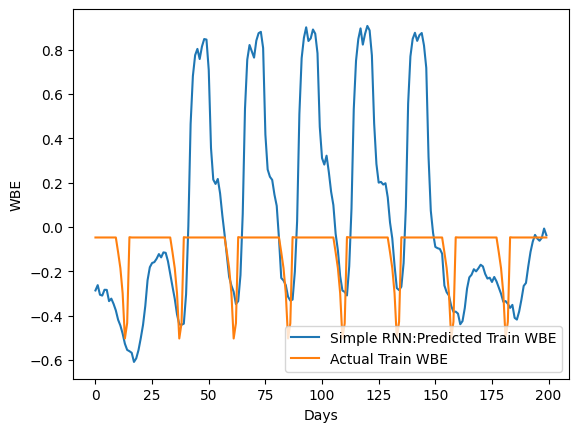

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]

plt.plot(aa,test_set_output[:200,0], label='Simple RNN:Predicted Train WBE')
plt.plot(aa, test_set_predictions[:200,0], label='Actual Train WBE')
ax.set_xlabel('Days')
ax.set_ylabel('WBE')
plt.legend();
plt.show()



NameError: ignored

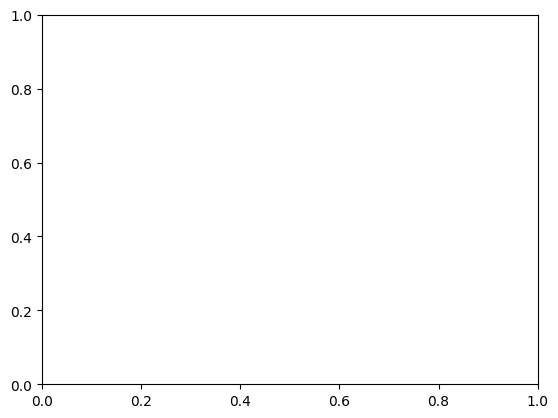

In [ ]:

fig,ax = plt.subplots()
plt.plot(aa,model_predictions[:200,0], label='Simple RNN:Predicted Test WBE')
plt.plot(aa,actual_testset_values[:200,0], label='Actual Test WBE')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();

NameError: ignored

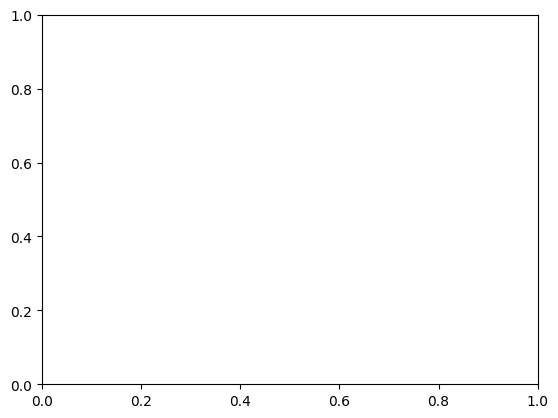

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]

plt.plot(aa,model_trainpredictions[:200,1], label='Simple RNN:Predicted Train WBCW')
plt.plot(aa,actual_trainingset_values[:200,1], label='Actual Train WBCW')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();
plt.show()



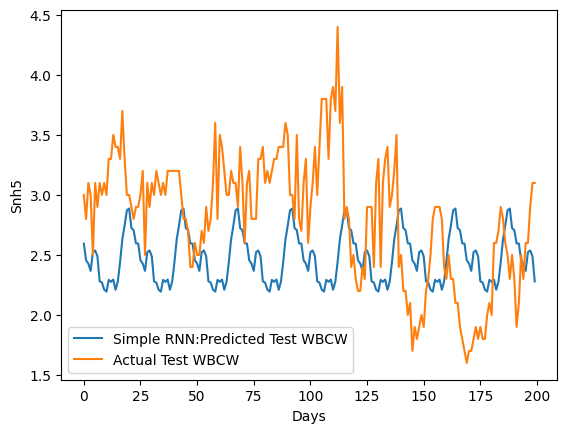

In [ ]:

fig,ax = plt.subplots()
plt.plot(aa,model_predictions[:200,2], label='Simple RNN:Predicted Test WBCW')
plt.plot(aa,actual_testset_values[:200,2], label='Actual Test WBCW')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();

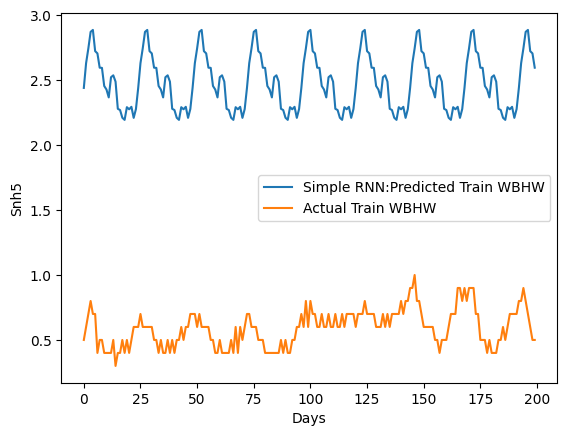

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]

plt.plot(aa,model_trainpredictions[:200,2], label='Simple RNN:Predicted Train WBHW')
plt.plot(aa,actual_trainingset_values[:200,2], label='Actual Train WBHW')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();
plt.show()


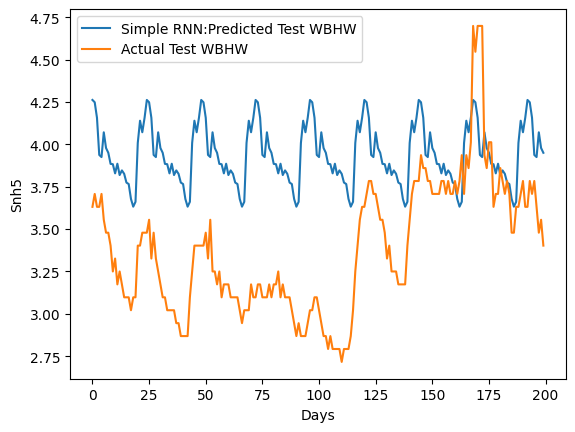

In [ ]:

fig,ax = plt.subplots()
plt.plot(aa,model_predictions[:200,1], label='Simple RNN:Predicted Test WBHW')
plt.plot(aa,actual_testset_values[:200,1], label='Actual Test WBHW')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();

LSTM

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.LSTM(units=8,activation='tanh',return_sequences=True,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
model2.add(keras.layers.LSTM(units=64,activation='tanh',return_sequences=True))
model2.add(keras.layers.LSTM(units=32,activation='tanh',return_sequences=True))
model2.add(keras.layers.LSTM(units=8,activation='tanh',return_sequences=False))
model2.add(keras.layers.Dense(units=3))

model2.compile(loss='mse', optimizer='Adam', run_eagerly=None)
model2.summary()

history2 = model2.fit(
        training_set_sequence,
        training_set_output,
        epochs=25,
        batch_size=25,
        shuffle=False,
        callbacks=[es])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 8)            544       
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           18688     
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           12416     
                                                                 
 lstm_3 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 32,987
Trainable params: 32,987
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
78/78 [==============================] 

In [ ]:

test_set_predictions2 = model2.predict(test_set_sequence)

model2_predictions = backnorm(test_set_predictions2)

mse=metrics.mean_squared_error(actual_testset_values, model2_predictions)
print('LSTM:Test MSE: ', mse)

train_set_predictions2 = model2.predict(training_set_sequence)

model2_trainpredictions= backnorm(train_set_predictions2)

mse=metrics.mean_squared_error(actual_trainingset_values, model2_trainpredictions)
print('LSTM:Train MSE: ', mse)

25/25 [==============================] - 1s 45ms/step
LSTM:Test MSE:  3.874634891061796
61/61 [==============================] - 4s 68ms/step
LSTM:Train MSE:  0.7006621366409966


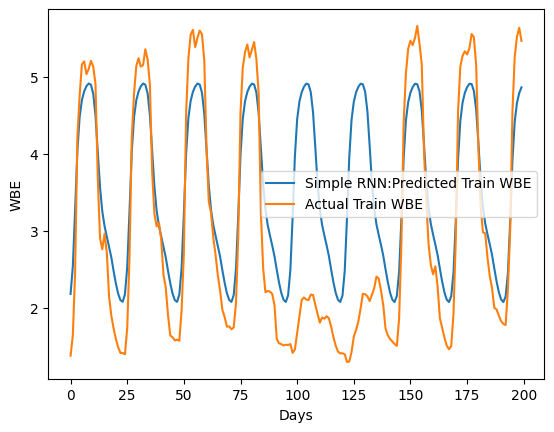

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]

plt.plot(aa,model2_trainpredictions[:200,0], label='Simple RNN:Predicted Train WBE')
plt.plot(aa,actual_trainingset_values[:200,0], label='Actual Train WBE')
ax.set_xlabel('Days')
ax.set_ylabel('WBE')
plt.legend();
plt.show()


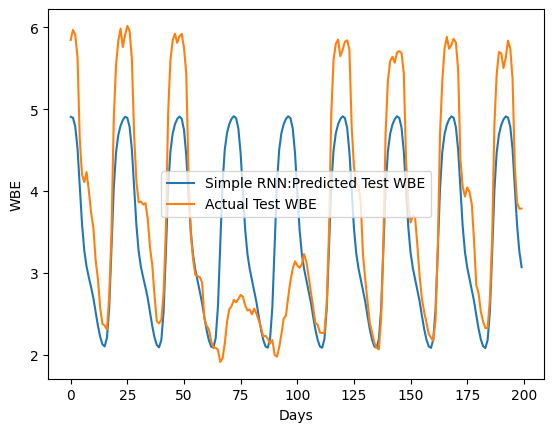

In [ ]:
fig,ax = plt.subplots()
plt.plot(aa,model2_predictions[:200,0], label='Simple RNN:Predicted Test WBE')
plt.plot(aa,actual_testset_values[:200,0], label='Actual Test WBE')
ax.set_xlabel('Days')
ax.set_ylabel('WBE')
plt.legend();

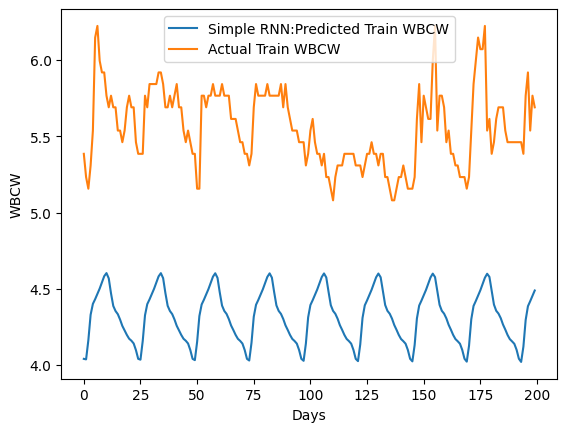

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]

plt.plot(aa,model2_trainpredictions[:200,1], label='Simple RNN:Predicted Train WBCW')
plt.plot(aa,actual_trainingset_values[:200,1], label='Actual Train WBCW')
ax.set_xlabel('Days')
ax.set_ylabel('WBCW')
plt.legend();
plt.show()


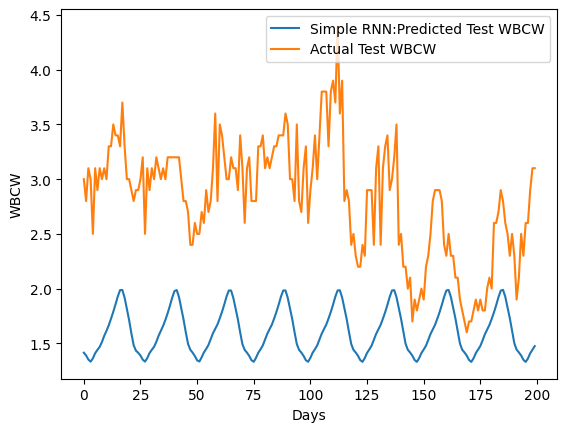

In [ ]:

fig,ax = plt.subplots()
plt.plot(aa,model2_predictions[:200,2], label='Simple RNN:Predicted Test WBCW')
plt.plot(aa,actual_testset_values[:200,2], label='Actual Test WBCW')
ax.set_xlabel('Days')
ax.set_ylabel('WBCW')
plt.legend();

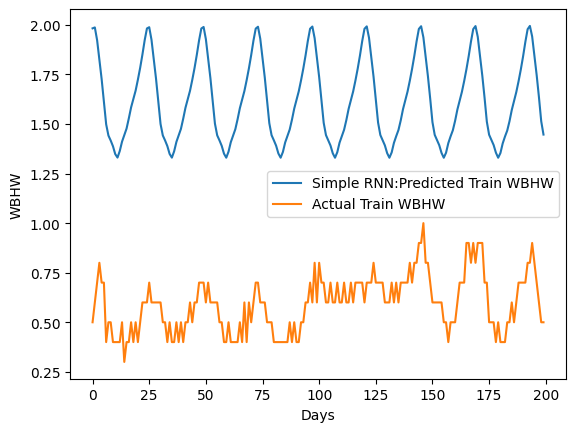

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]

plt.plot(aa,model2_trainpredictions[:200,2], label='Simple RNN:Predicted Train WBHW')
plt.plot(aa,actual_trainingset_values[:200,2], label='Actual Train WBHW')
ax.set_xlabel('Days')
ax.set_ylabel('WBHW')
plt.legend();
plt.show()


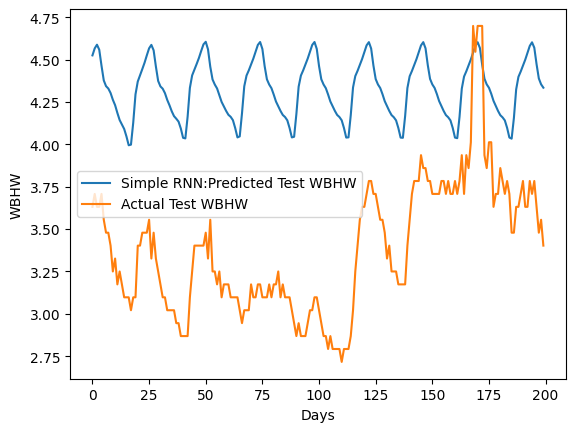

In [ ]:
fig,ax = plt.subplots()
plt.plot(aa,model2_predictions[:200,1], label='Simple RNN:Predicted Test WBHW')
plt.plot(aa,actual_testset_values[:200,1], label='Actual Test WBHW')
ax.set_xlabel('Days')
ax.set_ylabel('WBHW')
plt.legend();

GRU

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.GRU(units=8,activation='tanh',return_sequences=True,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
model3.add(keras.layers.GRU(units=64,activation='tanh',return_sequences=True))
model3.add(keras.layers.GRU(units=32,activation='tanh',return_sequences=True))
model3.add(keras.layers.GRU(units=16,activation='tanh',return_sequences=False))

model3.add(keras.layers.Dense(units=3))
model3.compile(loss='mse', optimizer='Adam', run_eagerly=None)
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 8)            432       
                                                                 
 gru_1 (GRU)                 (None, 100, 64)           14208     
                                                                 
 gru_2 (GRU)                 (None, 100, 32)           9408      
                                                                 
 gru_3 (GRU)                 (None, 16)                2400      
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 26,499
Trainable params: 26,499
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = model3.fit(
        training_set_sequence,
        training_set_output,
        epochs=25,
        batch_size=25,
        shuffle=False,
        callbacks=[es])


Epoch 1/25
78/78 [==============================] - 27s 236ms/step - loss: 0.1341
Epoch 2/25
78/78 [==============================] - 18s 227ms/step - loss: 0.1213
Epoch 3/25
78/78 [==============================] - 17s 217ms/step - loss: 0.1036
Epoch 4/25
78/78 [==============================] - 17s 218ms/step - loss: 0.0882
Epoch 5/25
78/78 [==============================] - 17s 219ms/step - loss: 0.0829
Epoch 6/25
78/78 [==============================] - 18s 230ms/step - loss: 0.0804
Epoch 7/25
78/78 [==============================] - 18s 233ms/step - loss: 0.0791
Epoch 8/25
78/78 [==============================] - 17s 222ms/step - loss: 0.0785
Epoch 9/25
78/78 [==============================] - 22s 283ms/step - loss: 0.0780
Epoch 10/25
78/78 [==============================] - 22s 276ms/step - loss: 0.0776
Epoch 11/25
78/78 [==============================] - 18s 225ms/step - loss: 0.0771
Epoch 12/25
78/78 [==============================] - 18s 230ms/step - loss: 0.0768
Epoch 13/25
7

In [ ]:

test_set_predictions3 = model3.predict(test_set_sequence)

model3_predictions = backnorm(test_set_predictions3)

mse=metrics.mean_squared_error(actual_testset_values, model3_predictions)
print('GRU:Test MSE: ', mse)

train_set_predictions3 = model3.predict(training_set_sequence)

model3_trainpredictions= backnorm(train_set_predictions3)

mse=metrics.mean_squared_error(actual_trainingset_values, model3_trainpredictions)
print('GRU:Train MSE: ', mse)

25/25 [==============================] - 3s 43ms/step
GRU:Test MSE:  3.212198285067592
61/61 [==============================] - 3s 42ms/step
GRU:Train MSE:  0.7424798930422724


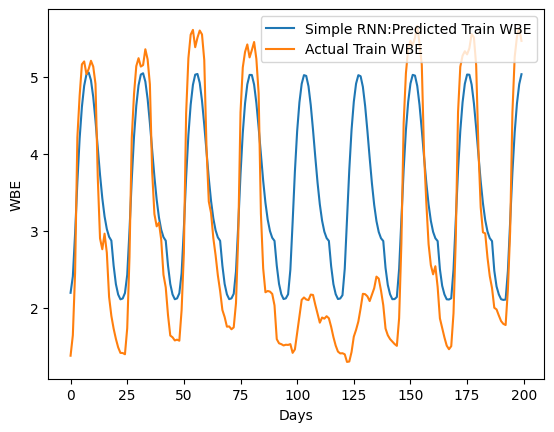

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]

plt.plot(aa,model3_trainpredictions[:200,0], label='Simple RNN:Predicted Train WBE')
plt.plot(aa,actual_trainingset_values[:200,0], label='Actual Train WBE')
ax.set_xlabel('Days')
ax.set_ylabel('WBE')
plt.legend();
plt.show()

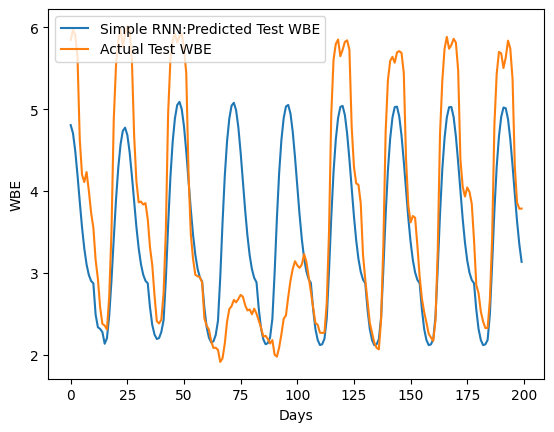

In [ ]:
fig,ax = plt.subplots()
plt.plot(aa,model3_predictions[:200,0], label='Simple RNN:Predicted Test WBE')
plt.plot(aa,actual_testset_values[:200,0], label='Actual Test WBE')
ax.set_xlabel('Days')
ax.set_ylabel('WBE')
plt.legend();

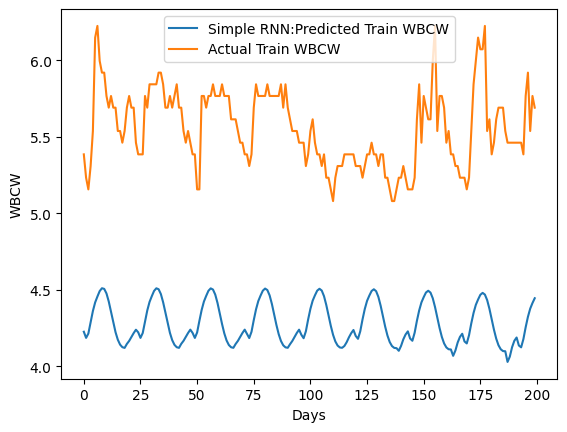

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]

plt.plot(aa,model3_trainpredictions[:200,1], label='Simple RNN:Predicted Train WBCW')
plt.plot(aa,actual_trainingset_values[:200,1], label='Actual Train WBCW')
ax.set_xlabel('Days')
ax.set_ylabel('WBCW')
plt.legend();
plt.show()


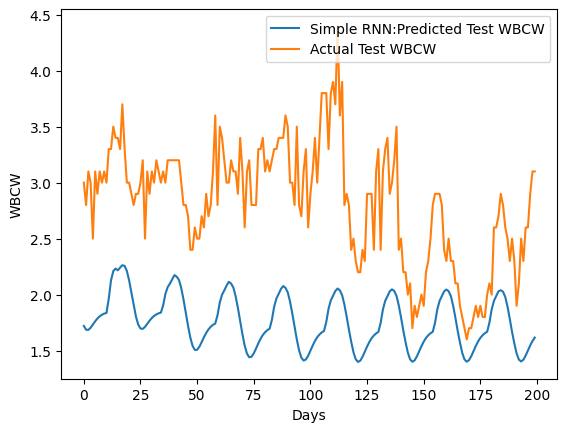

In [ ]:

fig,ax = plt.subplots()
plt.plot(aa,model3_predictions[:200,2], label='Simple RNN:Predicted Test WBCW')
plt.plot(aa,actual_testset_values[:200,2], label='Actual Test WBCW')
ax.set_xlabel('Days')
ax.set_ylabel('WBCW')
plt.legend();

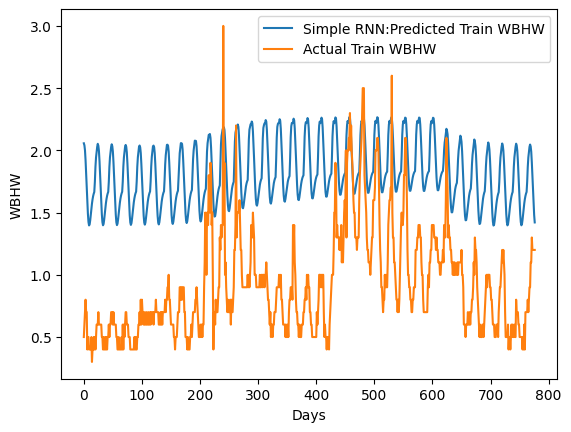

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(777)]

plt.plot(aa,model3_trainpredictions[:777,2], label='Simple RNN:Predicted Train WBHW')
plt.plot(aa,actual_trainingset_values[:777,2], label='Actual Train WBHW')
ax.set_xlabel('Days')
ax.set_ylabel('WBHW')
plt.legend();
plt.show()


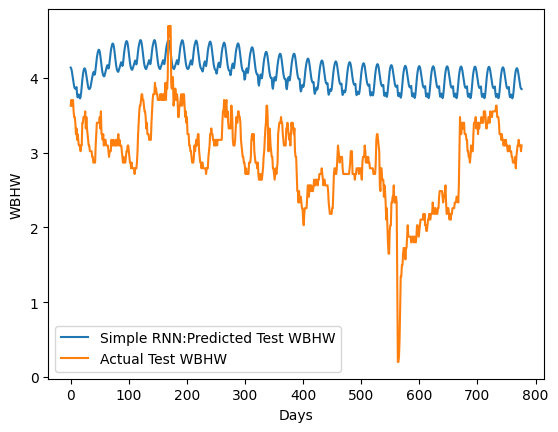

In [ ]:
fig,ax = plt.subplots()
plt.plot(aa,model3_predictions[:777,1], label='Simple RNN:Predicted Test WBHW')
plt.plot(aa,actual_testset_values[:777,1], label='Actual Test WBHW')
ax.set_xlabel('Days')
ax.set_ylabel('WBHW')
plt.legend();

In [ ]:
test_set_predictions = model.predict(test_set_sequence)

model_predictions = backnorm(test_set_predictions)
actual_testset_values = backnorm(test_set_output)

mse=metrics.mean_squared_error(actual_testset_values, model_predictions)
print('SimpleRNN:Test MSE: ', mse)

train_set_predictions = model.predict(training_set_sequence)

model_trainpredictions= backnorm(train_set_predictions)
actual_trainingset_values = backnorm(training_set_output)

mse=metrics.mean_squared_error(actual_trainingset_values, model_trainpredictions)
print('SimpleRNN:Train MSE: ', mse)

test_set_predictions2 = model2.predict(test_set_sequence)

model2_predictions = backnorm(test_set_predictions2)

mse=metrics.mean_squared_error(actual_testset_values, model2_predictions)
print('LSTM:Test MSE: ', mse)

train_set_predictions2 = model2.predict(training_set_sequence)

model2_trainpredictions= backnorm(train_set_predictions2)

mse=metrics.mean_squared_error(actual_trainingset_values, model2_trainpredictions)
print('LSTM:Train MSE: ', mse)

test_set_predictions3 = model3.predict(test_set_sequence)

model3_predictions = backnorm(test_set_predictions3)

mse=metrics.mean_squared_error(actual_testset_values, model3_predictions)
print('GRU:Test MSE: ', mse)

train_set_predictions3 = model3.predict(training_set_sequence)

model3_trainpredictions= backnorm(train_set_predictions3)

mse=metrics.mean_squared_error(actual_trainingset_values, model3_trainpredictions)
print('GRU:Train MSE: ', mse)

25/25 [==============================] - 1s 36ms/step
SimpleRNN:Test MSE:  2.301561223838218
61/61 [==============================] - 2s 34ms/step
SimpleRNN:Train MSE:  1.1588853139226238
25/25 [==============================] - 2s 64ms/step
LSTM:Test MSE:  3.874634891061796
61/61 [==============================] - 4s 66ms/step
LSTM:Train MSE:  0.7006621366409966
25/25 [==============================] - 1s 40ms/step
GRU:Test MSE:  3.212198285067592
61/61 [==============================] - 3s 42ms/step
GRU:Train MSE:  0.7424798930422724


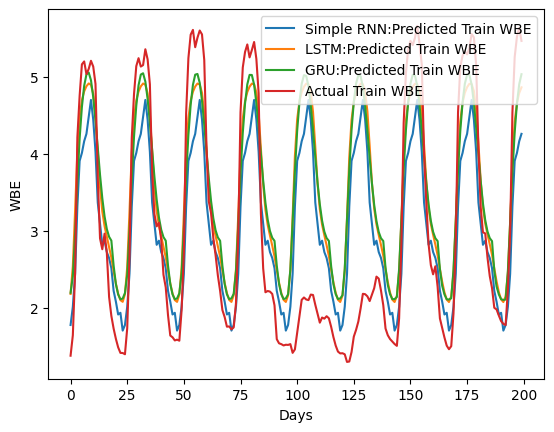

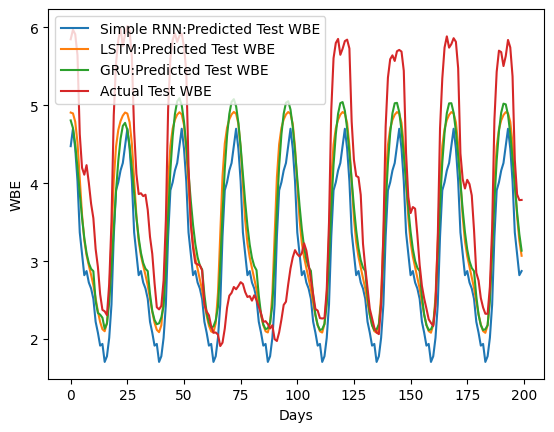

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]
plt.plot(aa,model_trainpredictions[:200,0], label='Simple RNN:Predicted Train WBE')
plt.plot(aa,model2_trainpredictions[:200,0], label='LSTM:Predicted Train WBE')
plt.plot(aa,model3_trainpredictions[:200,0], label='GRU:Predicted Train WBE')
plt.plot(aa,actual_trainingset_values[:200,0], label='Actual Train WBE')
ax.set_xlabel('Days')
ax.set_ylabel('WBE')
plt.legend();
plt.show()

fig,ax = plt.subplots()
aa=[x for x in range(200)]
plt.plot(aa,model_predictions[:200,0], label='Simple RNN:Predicted Test WBE')
plt.plot(aa,model2_predictions[:200,0], label='LSTM:Predicted Test WBE')
plt.plot(aa,model3_predictions[:200,0], label='GRU:Predicted Test WBE')
plt.plot(aa,actual_testset_values[:200,0], label='Actual Test WBE')
ax.set_xlabel('Days')
ax.set_ylabel('WBE')
plt.legend();

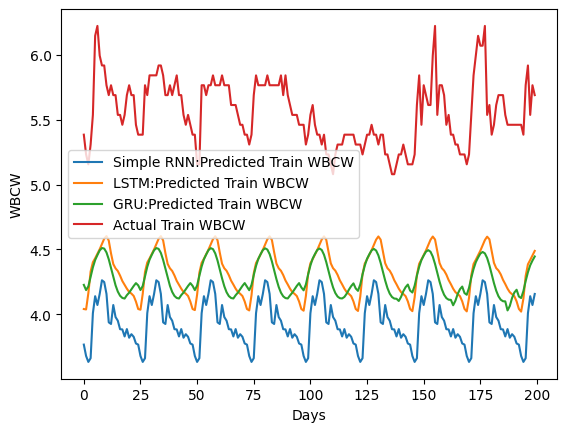

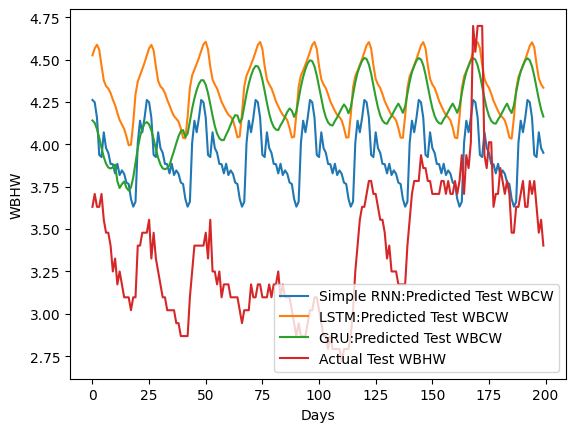

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]
plt.plot(aa,model_trainpredictions[:200,1], label='Simple RNN:Predicted Train WBCW')
plt.plot(aa,model2_trainpredictions[:200,1], label='LSTM:Predicted Train WBCW')
plt.plot(aa,model3_trainpredictions[:200,1], label='GRU:Predicted Train WBCW')
plt.plot(aa,actual_trainingset_values[:200,1], label='Actual Train WBCW')
ax.set_xlabel('Days')
ax.set_ylabel('WBCW')
plt.legend();
plt.show()

fig,ax = plt.subplots()
aa=[x for x in range(200)]
plt.plot(aa,model_predictions[:200,1], label='Simple RNN:Predicted Test WBCW')
plt.plot(aa,model2_predictions[:200,1], label='LSTM:Predicted Test WBCW')
plt.plot(aa,model3_predictions[:200,1], label='GRU:Predicted Test WBCW')
plt.plot(aa,actual_testset_values[:200,1], label='Actual Test WBHW')
ax.set_xlabel('Days')
ax.set_ylabel('WBHW')
plt.legend();

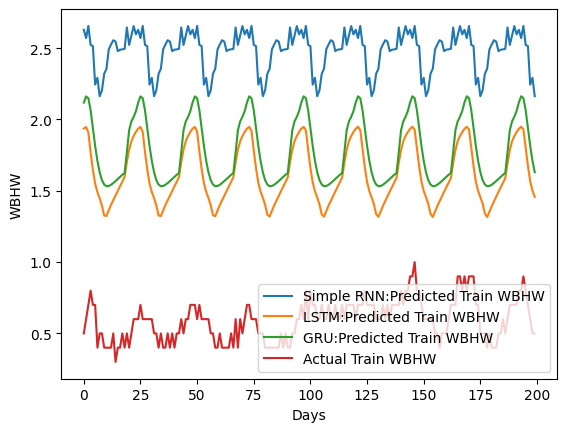

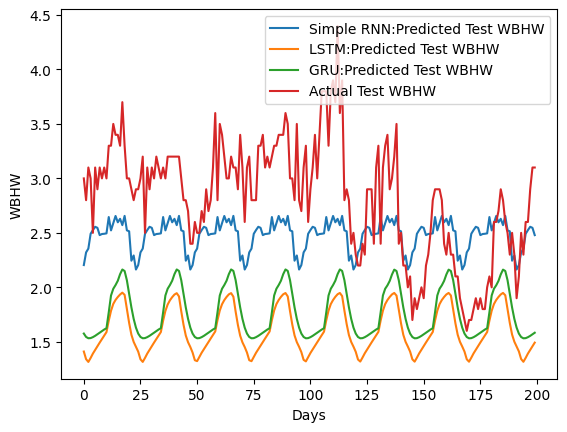

In [ ]:
fig,ax = plt.subplots()
aa=[x for x in range(200)]
plt.plot(aa,model_trainpredictions[:200,2], label='Simple RNN:Predicted Train WBHW')
plt.plot(aa,model2_trainpredictions[:200,2], label='LSTM:Predicted Train WBHW')
plt.plot(aa,model3_trainpredictions[:200,2], label='GRU:Predicted Train WBHW')
plt.plot(aa,actual_trainingset_values[:200,2], label='Actual Train WBHW')
ax.set_xlabel('Days')
ax.set_ylabel('WBHW')
plt.legend();
plt.show()

fig,ax = plt.subplots()
aa=[x for x in range(200)]
plt.plot(aa,model_predictions[:200,2], label='Simple RNN:Predicted Test WBHW')
plt.plot(aa,model2_predictions[:200,2], label='LSTM:Predicted Test WBHW')
plt.plot(aa,model3_predictions[:200,2], label='GRU:Predicted Test WBHW')
plt.plot(aa,actual_testset_values[:200,2], label='Actual Test WBHW')
ax.set_xlabel('Days')
ax.set_ylabel('WBHW')
plt.legend();